Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
num_days_R_prediction=42

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=24 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN           United States  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/13/20  \
185        0        0        0        0        0        0  ...       19   
186        0        0        0        0        0        0  ...       27   
187        0        0        0        0        0        0  ...       95   
188        0        0        0        0        0        0  ...        4   
189        0        0        0        0        0        0  ...        0   
190        0        0        0        0        0        0  ...        1   
191        0        0        0        0        0        0  ...       17   
192        0        0        0        0        0        0  ...     6165   
193        0        0        0        0        0        0  ...       22   
194        0        0        0        0        0        0  ...      128   

     8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  8/19/20  8/20/20  \
185       19       19       19       19       19       19       20   
186       31       35       35       36       37       39       41   
187       99      102      104      107      114      120      126   
188        4        4        4        4        4        5        6   
189        0        0        0        0        0        0        0   
190        1        1        1        1        1        1        1   
191       17       17       17       17       17       17       17   
192     6167     6169     6172     6172     6175     6181     6191   
193       22       22       22       22       22       22       22   
194      128      128      128      128      133      133      133   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 218 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/13/20  \
175        0        0        0        0        0        0  ...      114   
176        0        0        0        0        0        0  ...        7   
177        0        0        0        0        0        0  ...       30   
178        0        0        0        0        0        0  ...      102   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...     1531   
181        0        0        0        0        0        0  ...     2913   
182        0        0        0        0        0        0  ...     1075   
183        0        0        0        0        0        0  ...    34309   
184        0        0        0        0        0        0  ...     8662   

     8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  8/19/20  8/20/20  \
175      114      193      200      212      277      277      277   
176        7        7        7        7        7        7        7   
177       30       31       31       31       31       31       31   
178      102      107      107      107      107      133      146   
179        0        0        0        0        0        0        0   
180     1531     1531     1531     1531     1531     1531     1538   
181     2913     2913     2913     2913     2913     2913     2913   
182     1075     1077     1078     1078     1079     1079     1082   
183    35998    36290    36497    36834    37051    37304    37569   
184     9030     9123     9174     9174     9513     9625     9752   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 218 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/13/20  \
185        0        0        0        0        0        0  ...     2638   
186        0        0        0        0        0        0  ...     3544   
187        0        0        0        1        1        1  ...    24957   
188        0        0        0        0        0        0  ...      894   
189        0        0        0        0        0        0  ...       13   
190        0        0        0        0        0        0  ...       32   
191        0        0        0        0        0        0  ...      263   
192        0        0        0        0        0        0  ...    61204   
193        0        0        0        0        0        0  ...     1602   
194        0        0        0        0        0        0  ...     4115   

     8/14/20  8/15/20  8/16/20  8/17/20  8/18/20  8/19/20  8/20/20  \
185     2708     2791     2855     2914     2991     3045     3115   
186     3726     3907     4154     4344     4464     4665     4912   
187    25551    26019    26660    27241    28257    28938    29645   
188      973     1048     1102     1121     1205     1296     1387   
189       13       13       13       13       13       13       13   
190       32       33       34       36       36       36       36   
191      269      300      317      326      333      348      353   
192    61840    62495    63002    63484    63973    64525    65054   
193     1609     1622     1631     1643     1649     1654     1665   
194     4115     4115     4115     4115     4311     4311     4311   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 218 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN     Seychelles  -4.679600   55.492000        0        0   
221            NaN   Sierra Leone   8.460555  -11.779889        0        0   
222            NaN      Singapore   1.283300  103.833300        0        1   
223            NaN       Slovakia  48.669000   19.699000        0        0   
224            NaN       Slovenia  46.151200   14.995500        0        0   
225            NaN        Somalia   5.152149   46.199616        0        0   
226            NaN   South Africa -30.559500   22.937500        0        0   
227            NaN    South Sudan   6.877000   31.307000        0        0   
228            NaN          Spain  40.463667   -3.749220        0        0   
229            NaN      Sri Lanka   7.873054   80.771797        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  8/13/20  8/14/20  8/15/20  \
220        0        0        0        0  ...      127      127      127   
221        0        0        0        0  ...     1940     1947     1954   
222        3        3        4        5  ...    55497    55580    55661   
223        0        0        0        0  ...     2739     2801     2855   
224        0        0        0        0  ...     2332     2369     2401   
225        0        0        0        0  ...     3227     3250     3250   
226        0        0        0        0  ...   572865   579140   583653   
227        0        0        0        0  ...     2478     2482     2488   
228        0        0        0        0  ...   337334   342813   342813   
229        0        0        0        1  ...     2882     2886     2890   

     8/16/20  8/17/20  8/18/20  8/19/20  8/20/20   Population   \
220      127      127      127      132      132           NaN   
221     1956     1956     1959     1961     1969           NaN   
222    55747    55838    55938    56031    56099     5,612,000   
223     2902     2907     2922     3022     3102     5,459,087   
224     2416     2429     2456     2493     2536     2,078,878   
225     3256     3257     3257     3265     3265           NaN   
226   587345   589886   592144   596060   599940    59,148,674   
227     2489     2490     2490     2494     2494           NaN   
228   342813   359082   364196   370867   377906    46,660,000   
229     2893     2900     2902     2902     2918    21,440,000   

               region  
220    Seychelles_nan  
221  Sierra Leone_nan  
222     Singapore_nan  
223      Slovakia_nan  
224      Slovenia_nan  
225       Somalia_nan  
226  South Africa_nan  
227   South Sudan_nan  
228         Spain_nan  
229     Sri Lanka_nan  

[10 rows x 218 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

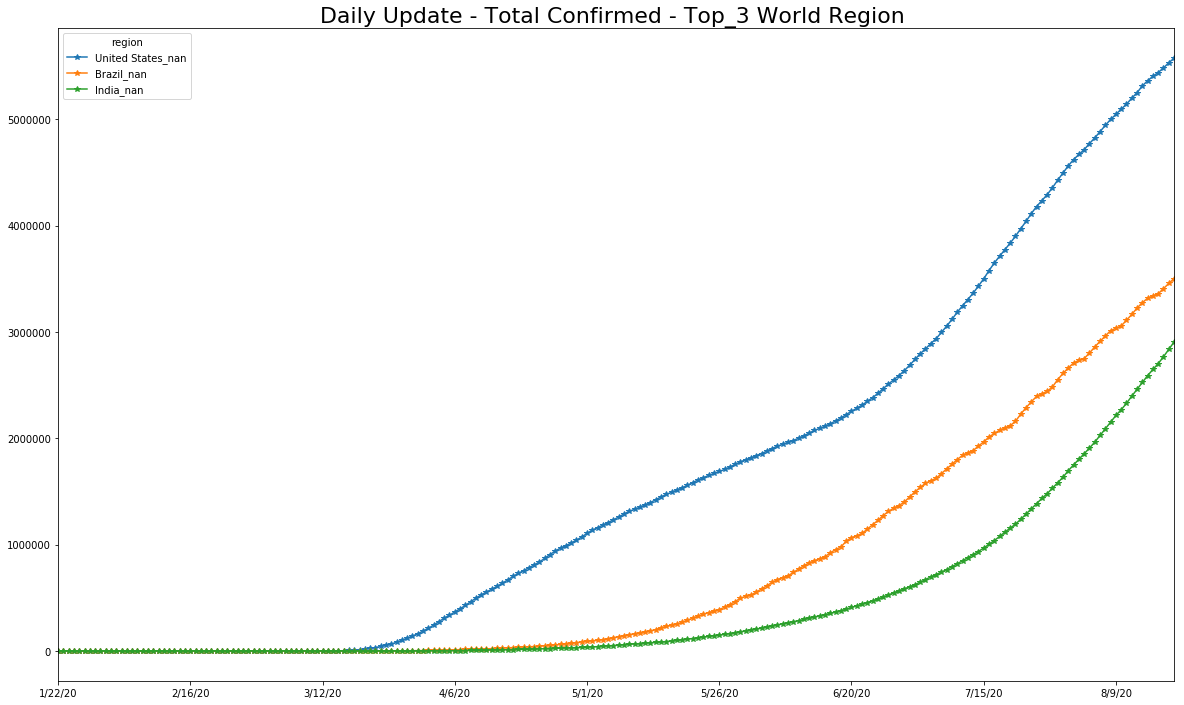

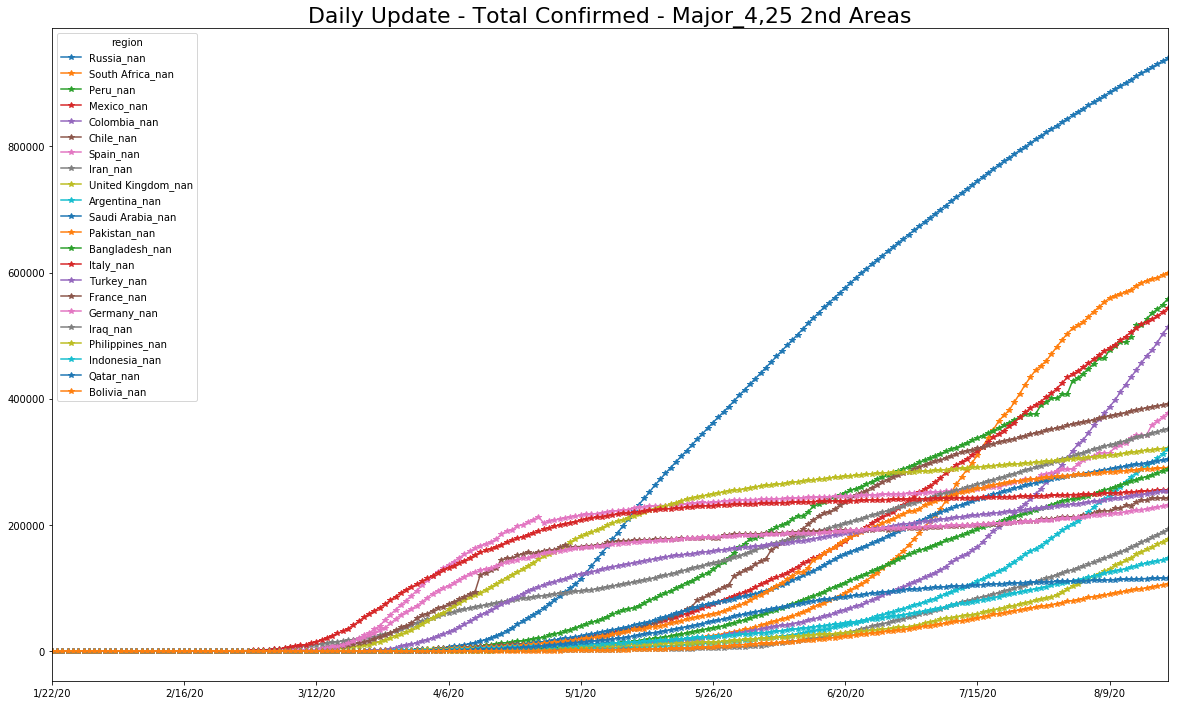

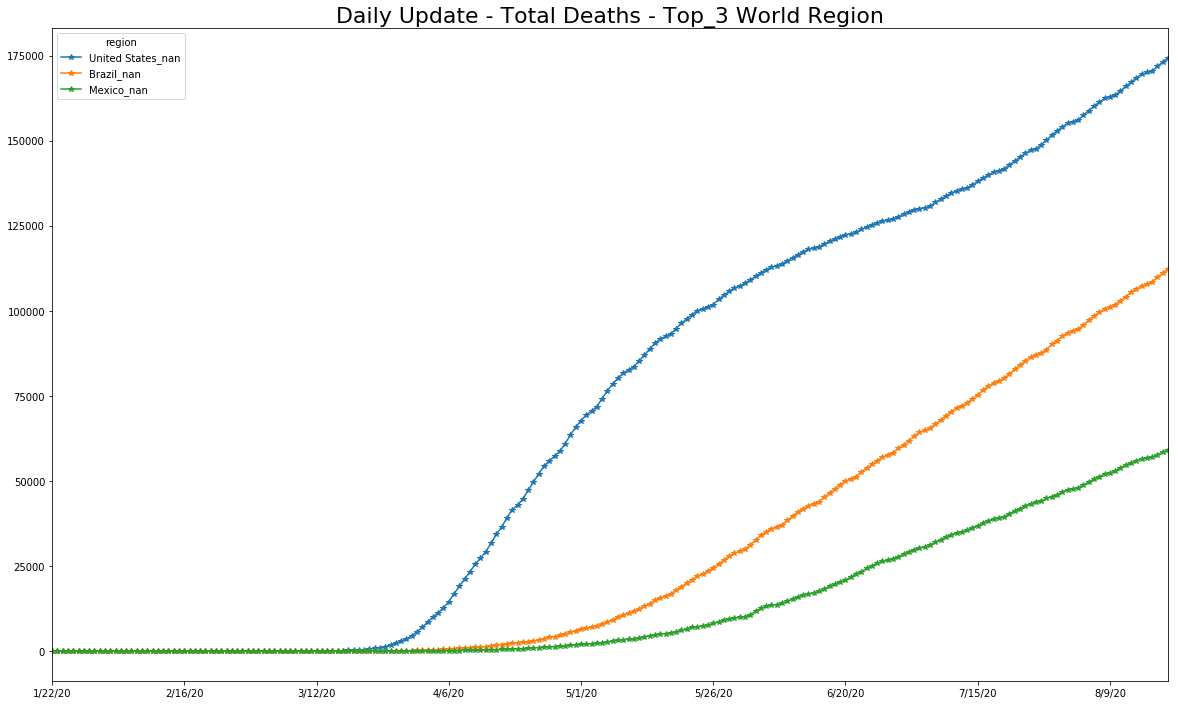

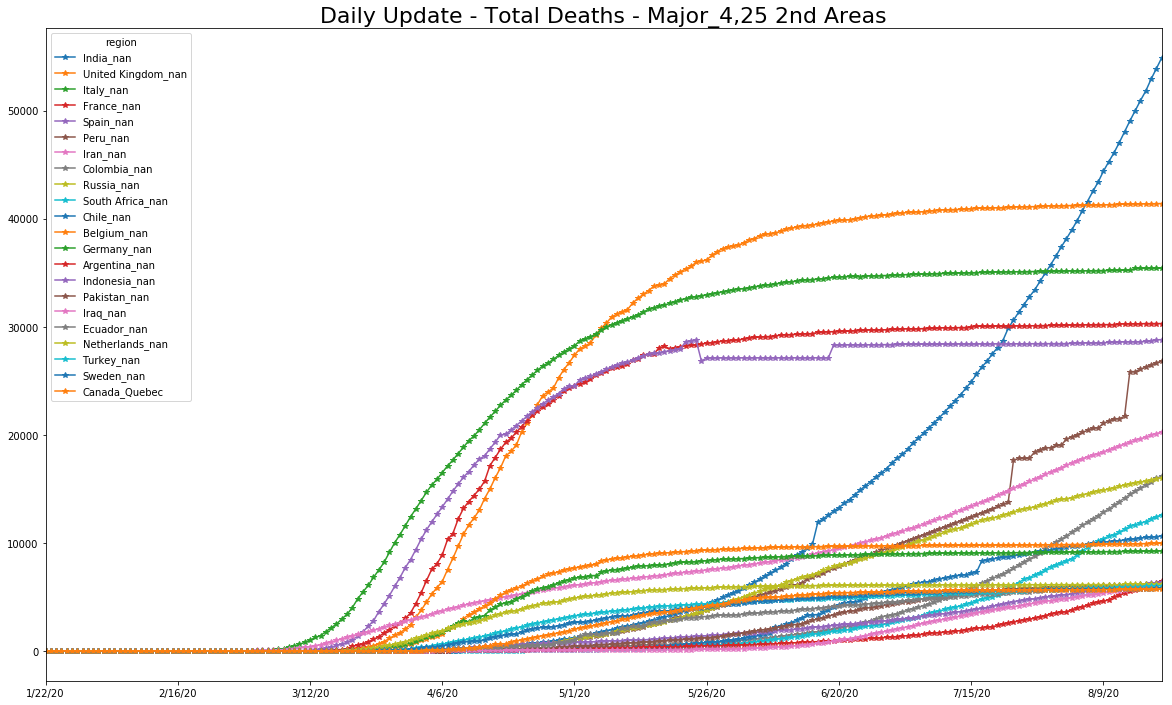

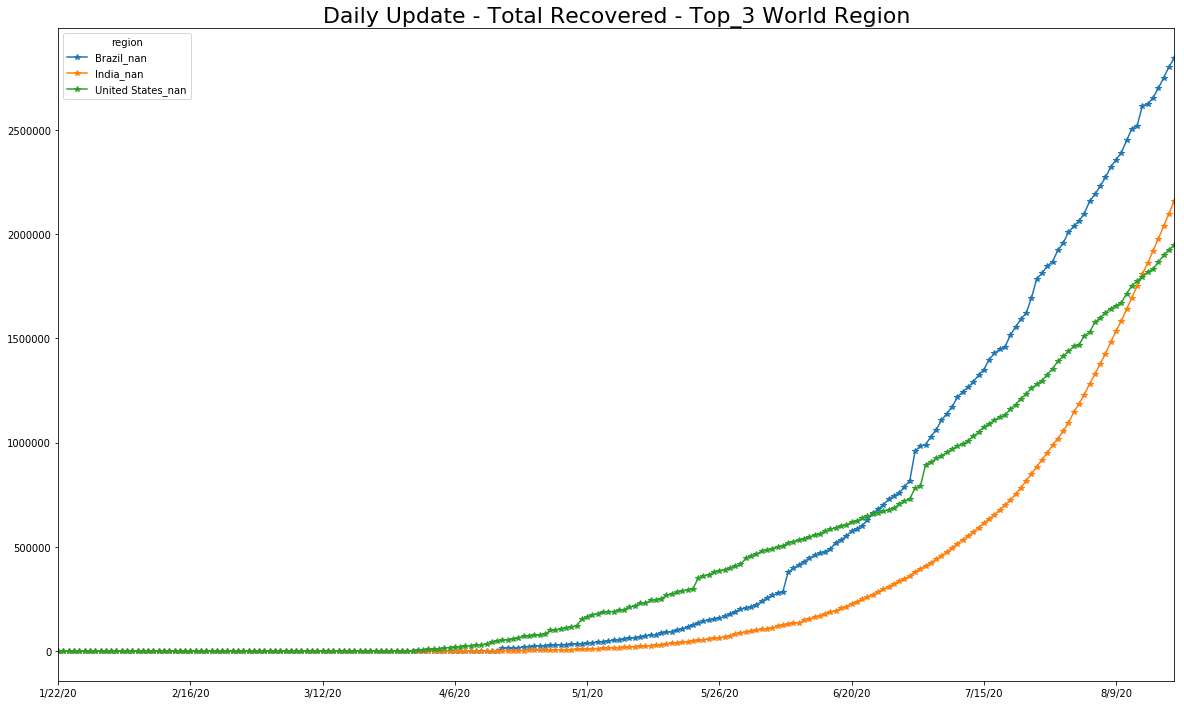

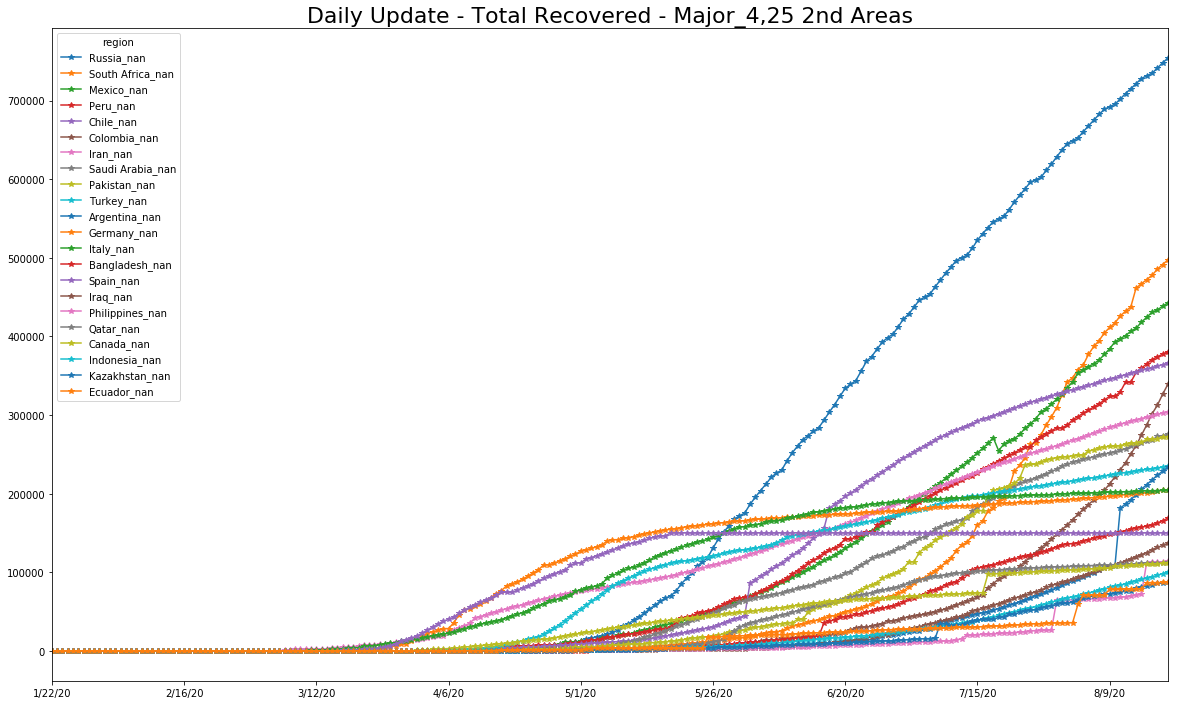

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/08/21


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
8/17/20            37599         7499        39025         1005        1935   
8/18/20            37599         7654        39444         1005        1966   
8/19/20            37599         7812        39847         1024        2015   
8/20/20            37856         7967        40258         1024        2044   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
8/17/20                       93         299126        41701   
8/18/20                       93         305966        41846   
8/19/20                       94         312659        42056   
8/20/20                       94         320884        42319   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
8/17/20                                     113                       3959   
8/18/20                                     113                       3966   
8/19/20                                     113                       3971   
8/20/20                                     113                       3972   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
8/17/20  ...            5438325         1457           35702          34802   
8/18/20  ...            5482416         1485           36352          35697   
8/19/20  ...            5529824         1493           37112          36868   
8/20/20  ...            5573847         1506           37547          37567   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
8/17/20          983                   16844                  10       1882   
8/18/20          989                   17306                  10       1889   
8/19/20          994                   17606                  10       1892   
8/20/20         1007                   17989                  10       1899   

region   Zambia_nan  Zimbabwe_nan  
8/17/20        9839          5308  
8/18/20        9981          5378  
8/19/20       10218          5643  
8/20/20       10372          5745  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
53034 2020-07-23     Zimbabwe_nan       2124           214           423   
53035 2020-07-24     Zimbabwe_nan       2296            90           411   
53036 2020-07-25     Zimbabwe_nan       2434           172           476   
53037 2020-07-26     Zimbabwe_nan       2512           138           400   
53038 2020-07-27     Zimbabwe_nan       2704            78           388   
53039 2020-07-28     Zimbabwe_nan       2817           192           408   
53040 2020-07-29     Zimbabwe_nan       2879           113           383   
53041 2020-07-30     Zimbabwe_nan       3092            62           367   
53042 2020-07-31     Zimbabwe_nan       3169           213           388   
53043 2020-08-01     Zimbabwe_nan       3659            77           352   
53044 2020-08-02     Zimbabwe_nan       3921           490           780   
53045 2020-08-03     Zimbabwe_nan       4075           262           829   
53046 2020-08-04     Zimbabwe_nan       4221           154           906   
53047 2020-08-05     Zimbabwe_nan       4221           146           562   
53048 2020-08-06     Zimbabwe_nan       4339             0           300   
53049 2020-08-07     Zimbabwe_nan       4451           118           264   
53050 2020-08-08     Zimbabwe_nan       4575           112           230   
53051 2020-08-09     Zimbabwe_nan       4649           124           354   
53052 2020-08-10     Zimbabwe_nan       4748            74           310   
53053 2020-08-11     Zimbabwe_nan       4818            99           297   
53054 2020-08-12     Zimbabwe_nan       4893            70  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
53063 2020-08-21  Zimbabwe_nan          0           102           437   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
53063           755         101.807726         108.233044         115.130461   

       last_day  kalman_prediction  population  infected_rate  min  max  
53063      5745             5812.0    14862924       0.000004  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
53061  2020-08-19  Zimbabwe_nan       5643            70           202   
53062  2020-08-20  Zimbabwe_nan       5745           265           382   
53063  2020-08-21  Zimbabwe_nan          0           102           437   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
53061           560         101.318953         103.902821         111.623288   
53062           750         104.927668         107.261167         115.328224   
53063           755         101.807726         108.233044         115.130461   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
53061                 5378  ...    14862924       0.000004  NaN  NaN   
53062                 5643  ...    14862924       0.000004  NaN  NaN   
53063                 5745  ...    14862924       0.000004  NaN  NaN   

       population_percentage : infected_rate confirmed  \
53061                                         0.000362   
53062                                         0.000380   
53063                                         0.000387   

       population_percentage : factor 9/10 infected_rate confirmed  \
53061                                           0.003619             
53062                                           0.003797             
53063                                           0.003866             

       delta : new_cases  delta : new_cases per 1M hab  \
53061               91.0                      6.122618   
53062               10.0                      0.672815   
53063               67.0                      4.507861   

       delta : roling 7day AVG  \
53061                80.000000   
53062               107.142857   
53063               107.857143   

       delta : aprox 14-day case notification rate per 100k hab  
53061                                           7.535529         
53062                                          10.092227         
53063                                          10.159508         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.604329e+11  400540.799535  34050.918782


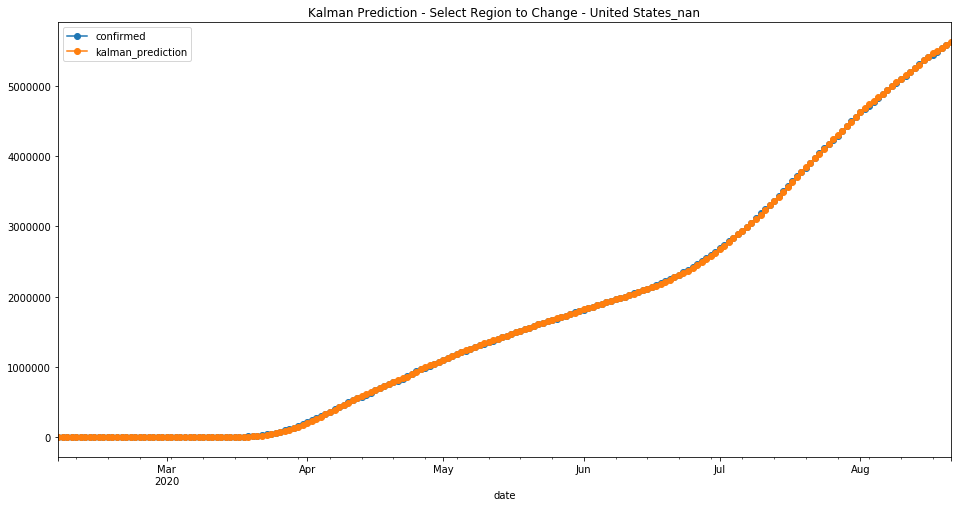

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  4.532416e+09  67323.223097  5420.472081


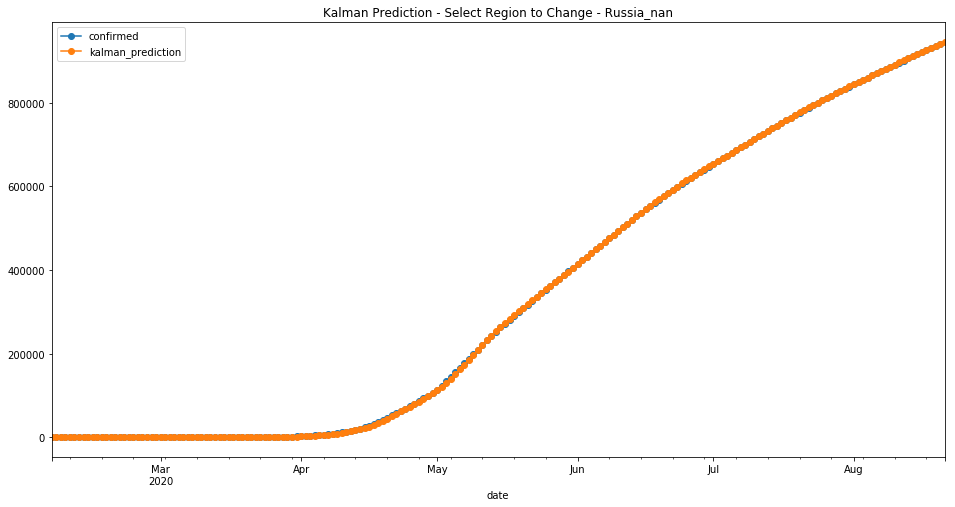

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  6.362198e+10  252233.977855  24696.720812


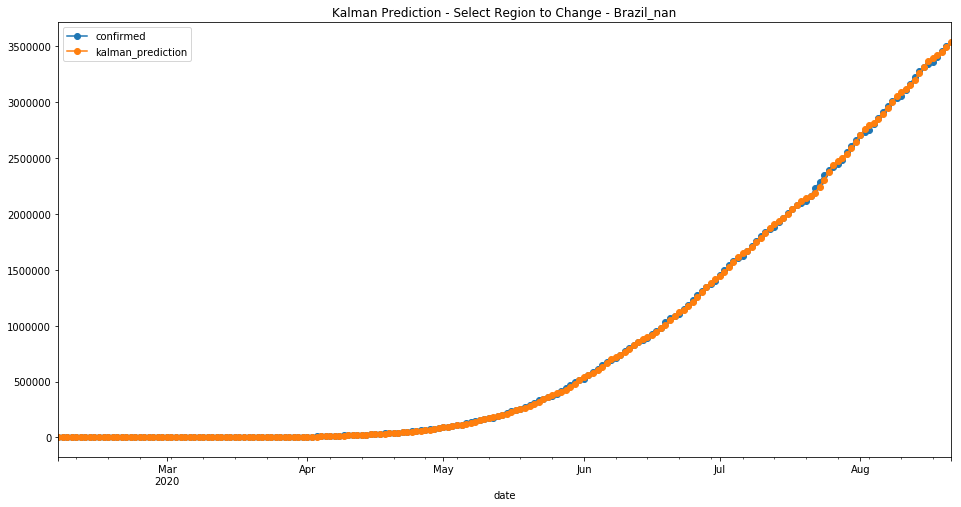

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
255  United Kingdom_nan  5.311296e+08  23046.24932  2133.822335


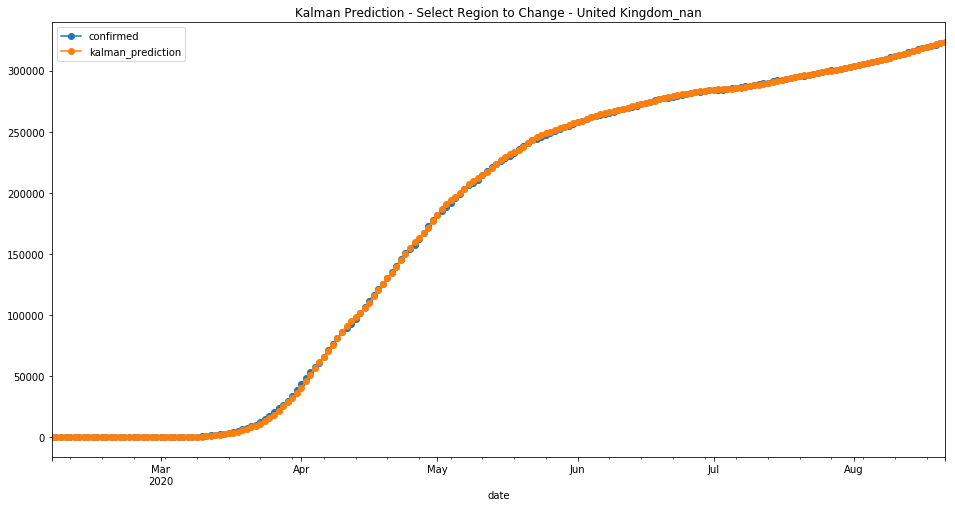

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpny3fum3z
  JVM stdout: /tmp/tmpny3fum3z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpny3fum3z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 9 months and 25 days !!!
H2O cluster name:           H2O_from_python_unknownUser_i7hzxv
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-28
last_train_date= 2020-08-20
first_bootstrap_date= 2020-08-12
boost_bootstrap_date= 2020-08-17
first_test_date= 2020-08-11
last_test_date= 2020-08-21
first_valid_date= 2020-08-19


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   37349.0      37345 2020-08-12  Afghanistan_nan
1   37392.0      37424 2020-08-13  Afghanistan_nan
2   37477.0      37431 2020-08-14  Afghanistan_nan
3   37435.0      37551 2020-08-15  Afghanistan_nan
4   37625.0      37596 2020-08-16  Afghanistan_nan
5   37658.0      37599 2020-08-17  Afghanistan_nan
6   37606.0      37599 2020-08-18  Afghanistan_nan
7   37608.0      37599 2020-08-19  Afghanistan_nan
8   37605.0      37856 2020-08-20  Afghanistan_nan
9   37992.0          0 2020-08-21  Afghanistan_nan
10   6822.0       6817 2020-08-12      Albania_nan
11   6962.0       6971 2020-08-13      Albania_nan
12   7122.0       7117 2020-08-14      Albania_nan
13   7263.0       7260 2020-08-15      Albania_nan
14   7407.0       7380 2020-08-16      Albania_nan
15   7517.0       7499 2020-08-17      Albania_nan
16   7640.0       7654 2020-08-18      Albania_nan
17   7817.0       7812 2020-08-19      Albania_nan
18   7974.0       7967 2020-08-20      Albania_nan
19   8117.0          0 2020-08-21      Albania_nan
20  36772.0      36699 2020-08-12      Algeria_nan
21  37244.0      37187 2020-08-13      Algeria_nan
22  37725.0      37664 2020-08-14      Algeria_nan
23  38189.0      38133 2020-08-15      Algeria_nan
24  38645.0      38583 2020-08-16      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  34289.0      34343 2020-08-17  Azerbaijan_nan
176  34426.0      34474 2020-08-18  Azerbaijan_nan
177  34560.0      34620 2020-08-19  Azerbaijan_nan
178  34715.0      34759 2020-08-20  Azerbaijan_nan
179  34854.0          0 2020-08-21  Azerbaijan_nan
180   1042.0       1036 2020-08-12     Bahamas_nan
181   1085.0       1089 2020-08-13     Bahamas_nan
182   1152.0       1119 2020-08-14     Bahamas_nan
183   1161.0       1252 2020-08-15     Bahamas_nan
184   1348.0       1315 2020-08-16     Bahamas_nan
185   1384.0       1329 2020-08-17     Bahamas_nan
186   1358.0       1424 2020-08-18     Bahamas_nan
187   1517.0       1531 2020-08-19     Bahamas_nan
188   1638.0       1610 2020-08-20     Bahamas_nan
189   1689.0          0 2020-08-21     Bahamas_nan
190  45224.0      45264 2020-08-12     Bahrain_nan
191  45707.0      45726 2020-08-13     Bahrain_nan
192  46168.0      46052 2020-08-14     Bahrain_nan
193  46403.0      46430 2020-08-15     Bahrain_nan
194  46835.0      46835 2020-08-16     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  69018.0      69102 2020-08-12  Belarus_nan
221  69134.0      69203 2020-08-13  Belarus_nan
222  69234.0      69308 2020-08-14  Belarus_nan
223  69330.0      69308 2020-08-15  Belarus_nan
224  69266.0      69516 2020-08-16  Belarus_nan
225  69584.0      69589 2020-08-17  Belarus_nan
226  69595.0      69673 2020-08-18  Belarus_nan
227  69662.0      69801 2020-08-19  Belarus_nan
228  69843.0      69950 2020-08-20  Belarus_nan
229  69996.0          0 2020-08-21  Belarus_nan
230  75531.0      75647 2020-08-12  Belgium_nan
231  76382.0      76191 2020-08-13  Belgium_nan
232  76789.0      77113 2020-08-14  Belgium_nan
233  77823.0      77869 2020-08-15  Belgium_nan
234  78509.0      78323 2020-08-16  Belgium_nan
235  78706.0      78534 2020-08-17  Belgium_nan
236  78879.0      78897 2020-08-18  Belgium_nan
237  79431.0      79479 2020-08-19  Belgium_nan
238  80126.0      80178 2020-08-20  Belgium_nan
239  80843.0          0 2020-08-21  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  18530905.80762807
# MSE on the validation data =  466082759181.45667
# R^2 on the training data =  0.9999370583664324
# R^2 on the validation data =  0.4623060424819232


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1597995083877_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 18530905.80762807
RMSE: 4304.753861445282
MAE: 866.2211271251479
RMSLE: 0.2945377762671875
Mean Residual Deviance: 18530905.80762807

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 466082759181.45667
RMSE: 682702.5407755977
MAE: 157135.592387792
RMSLE: 6.521024873381143
Mean Residual Deviance: 466082759181.45667
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae       training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  -----------------  -------------------  -----------------  ------------------  ---------------------
     2020-08-21 07:31:30  0.074 sec   0.0                nan                 nan                nan                  nan                nan                 nan
     2020-08-21 07:31:31  0.503 sec   1.0                24516.718344571604  4299.075221445382  601069478.3870538    696401.6251278787  158518.84818412163  484975223480.7506
     2020-08-21 07:31:31  0.649 sec   2.0                18123.17731895109   3224.393700654915  328449556.1341432    691608.2958281398  157555.17352899775  478322034858.30365
     2020-08-21 07:31:31  0.889 sec   3.0                19130.427528314707  3263.63113326787   365973257.41610116   689187.646370087   157327.5528037269   474979611909.1402
     2020-08-21 07:31:32  1.148 sec   4.0                18152.49190583211   3062.243661965999  329512962.3913003    688918.6881075817  157223.6102672096   474608958823.87146
---  ---                  ---         ---                ---                 ---                ---                  ---                ---                 ---
     2020-08-21 07:31:42  12.106 sec  209.0              4901.457446047727   923.7973111590992  24024285.095416706   683752.5706915277  156876.25592364027  467517577927.2725
     2020-08-21 07:31:47  16.140 sec  298.0              4785.172168275536   918.2171015520879  22897872.680038795   682463.9682296732  156944.7178695361   465757067931.79236
     2020-08-21 07:31:51  20.166 sec  387.0              4521.186312151717   889.9384478689229  20441125.669188045   682291.5045653186  156910.68171579938  465521697202.00616
     2020-08-21 07:31:55  24.195 sec  477.0              4334.587464053988   874.5124009422152  18788648.48353398    682843.6531058243  157175.42341704405  466275454586.9072
     2020-08-21 07:31:56  25.487 sec  500.0              4304.753861445282   866.2211271251479  18530905.80762807    682702.5407755977  157135.592387792    466082759181.45667


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  3.63322e+17            1                    0.351547
last_day           3.13641e+17            0.863259             0.303476
7_day_change       1.58291e+17            0.435677             0.153161
3_day_change       9.50675e+16            0.261662             0.0919864
1_day_change       4.66713e+16            0.128457             0.0451587
infected_rate      2.7022e+16             0.0743747            0.0261462
region             1.65222e+16            0.0454754            0.0159867
max                3.78474e+15            0.0104171            0.00366208
min                3.56519e+15            0.00981275           0.00344964
7_day_change_rate  2.44006e+15            0.00671599           0.00236098
1_day_change_rate  1.96145e+15            0.00539866           0.00189788
3_day_change_rate  1.20677e+15            0.00332148           0.00116766

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.633219e+17           1.000000    0.351547
1            last_day         3.136409e+17           0.863259    0.303476
2        7_day_change         1.582911e+17           0.435677    0.153161
3        3_day_change         9.506754e+16           0.261662    0.091986
4        1_day_change         4.667131e+16           0.128457    0.045159
5       infected_rate         2.702196e+16           0.074375    0.026146
6              region         1.652219e+16           0.045475    0.015987
7                 max         3.784743e+15           0.010417    0.003662
8                 min         3.565186e+15           0.009813    0.003450
9   7_day_change_rate         2.440065e+15           0.006716    0.002361
10  1_day_change_rate         1.961450e+15           0.005399    0.001898
11  3_day_change_rate         1.206768e+15           0.003321    0.001168

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


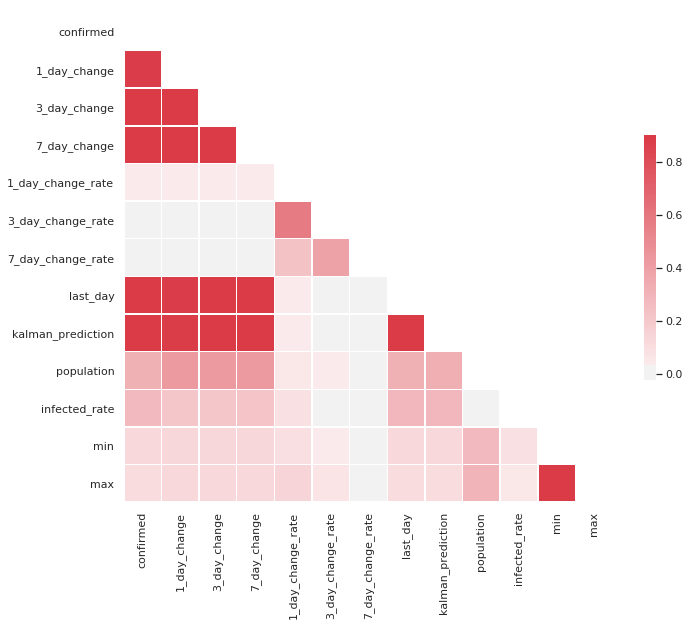

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.881365
3_day_change         0.894103
7_day_change         0.910433
1_day_change_rate    0.035184
3_day_change_rate    0.007751
7_day_change_rate   -0.008922
last_day             0.984393
kalman_prediction    0.984551
population           0.323221
infected_rate        0.276341
min                  0.122418
max                  0.107928
Name: confirmed, dtype: float64


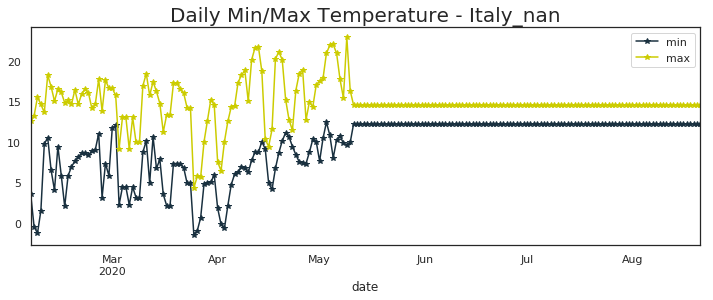

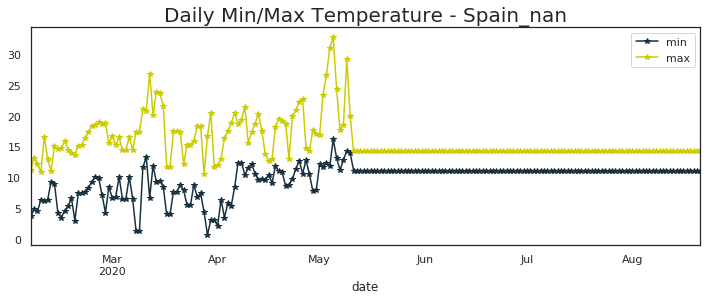

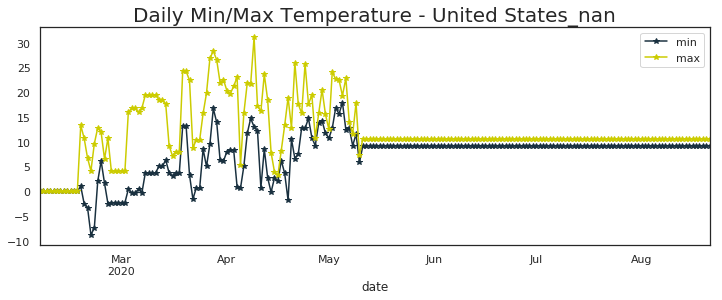

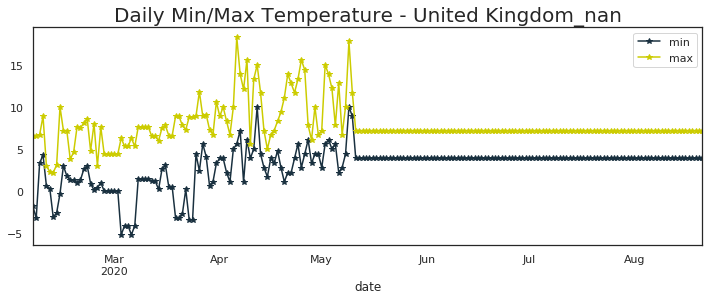

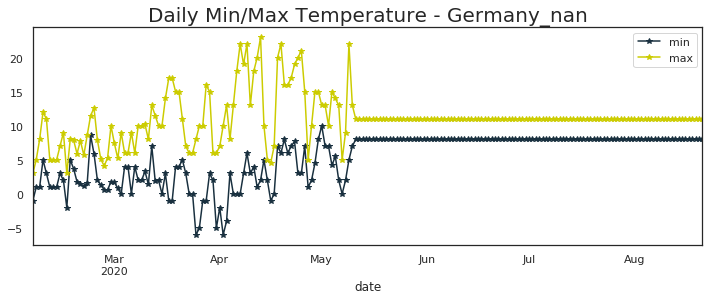

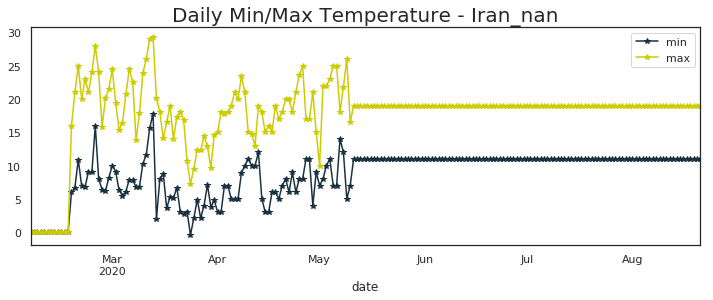

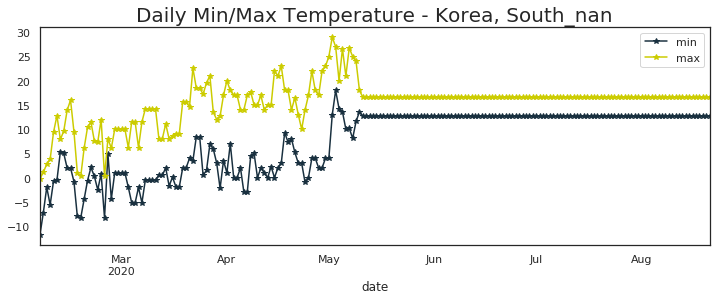

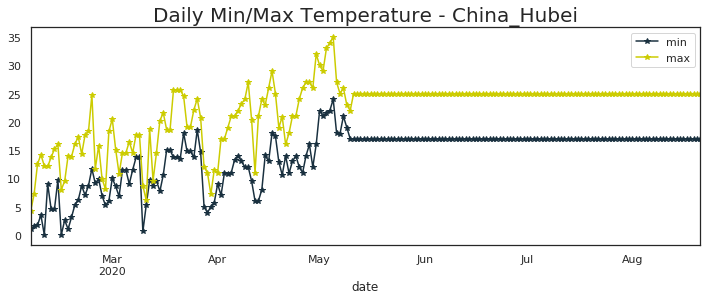

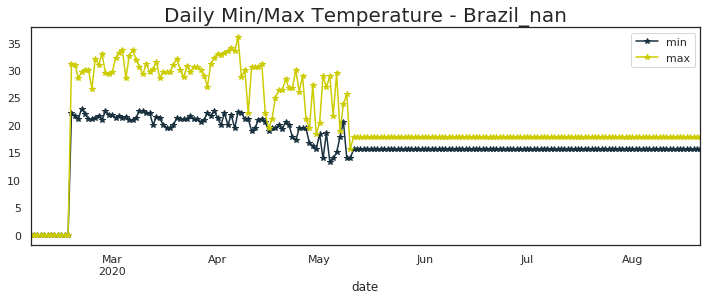

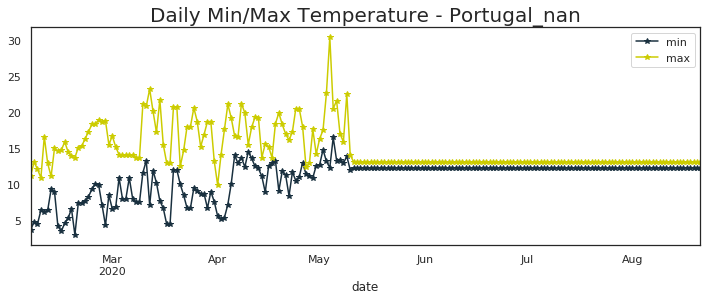

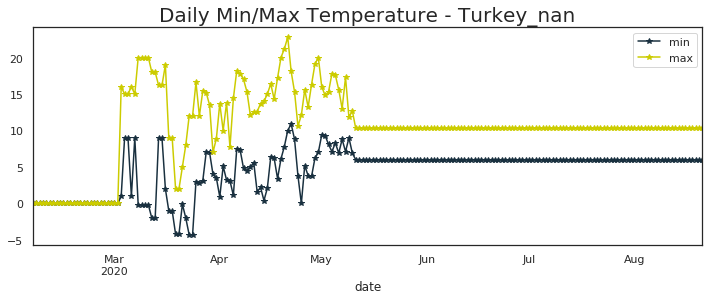

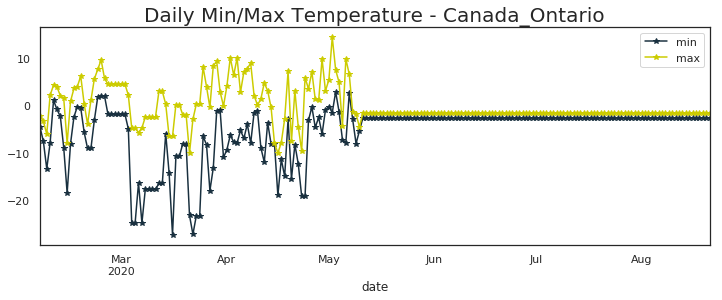

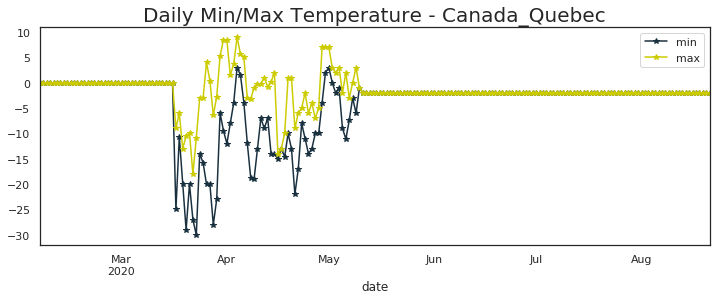

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
India_nan                   30.0  43.0
Russia_nan                  13.0  30.0
South Africa_nan             0.0   0.0
Peru_nan                     0.0   0.0
Mexico_nan                   0.0   0.0
Colombia_nan                 0.0   0.0
Chile_nan                    0.0   0.0
Spain_nan                   16.2  32.7
Iran_nan                    17.8  29.3
United Kingdom_nan          10.0  18.3
Argentina_nan                0.0   0.0
Saudi Arabia_nan             0.0   0.0
Pakistan_nan                16.0  28.0
Bangladesh_nan               0.0   0.0
Italy_nan                   12.4  22.9
Turkey_nan                  10.9  22.8
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Iraq_nan                    21.2  29.1
Philippines_nan             27.8  35.0
Indonesia_nan               

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

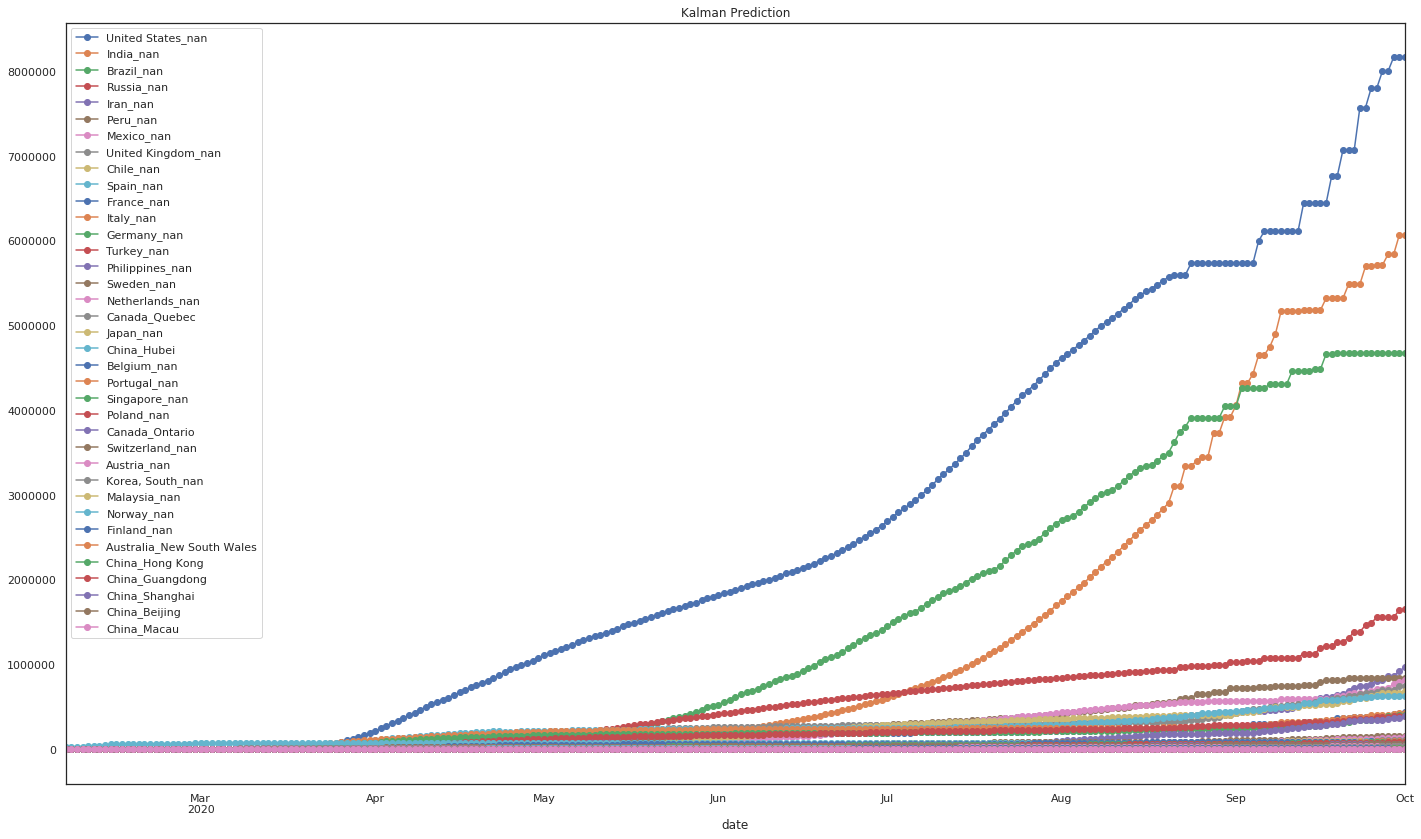

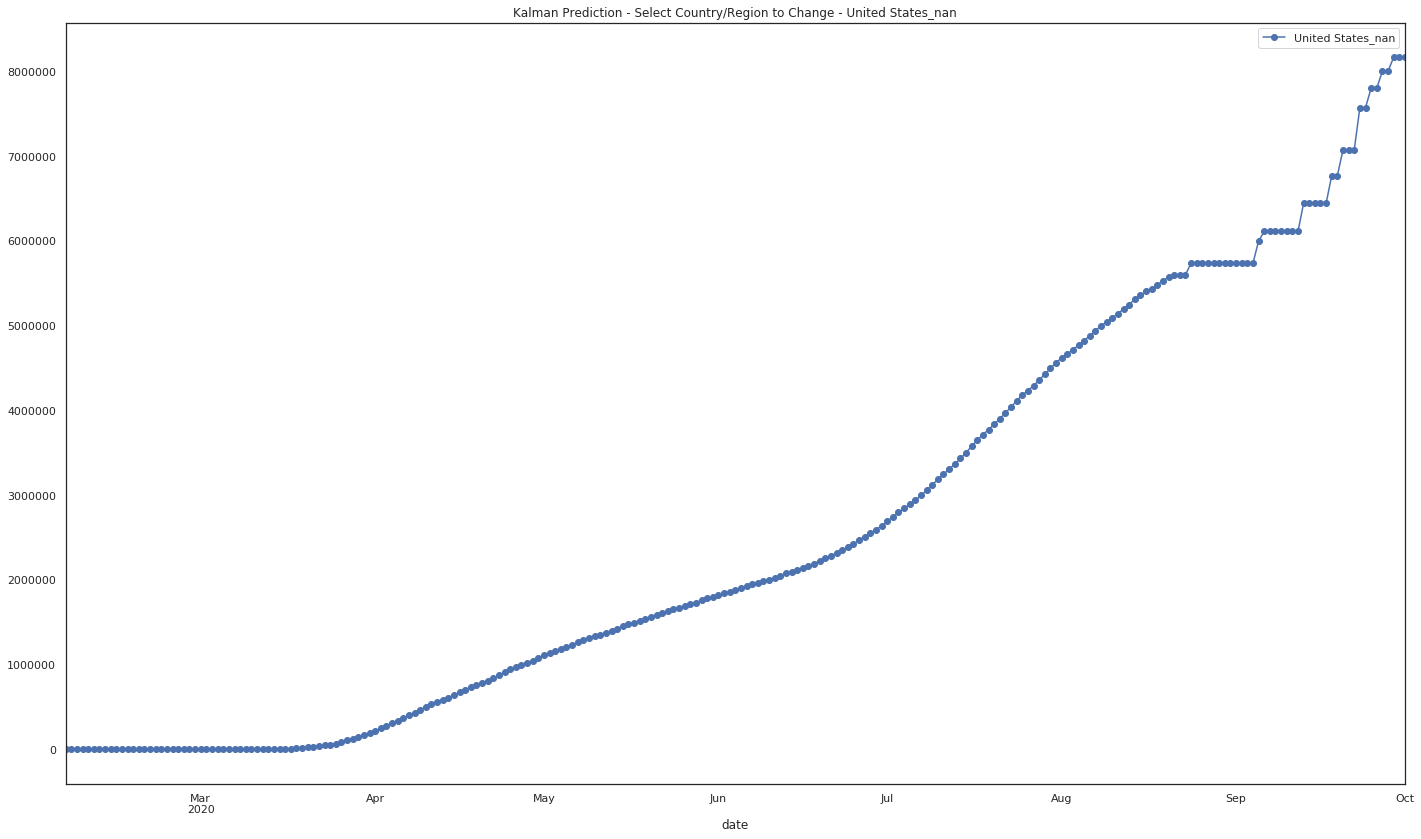

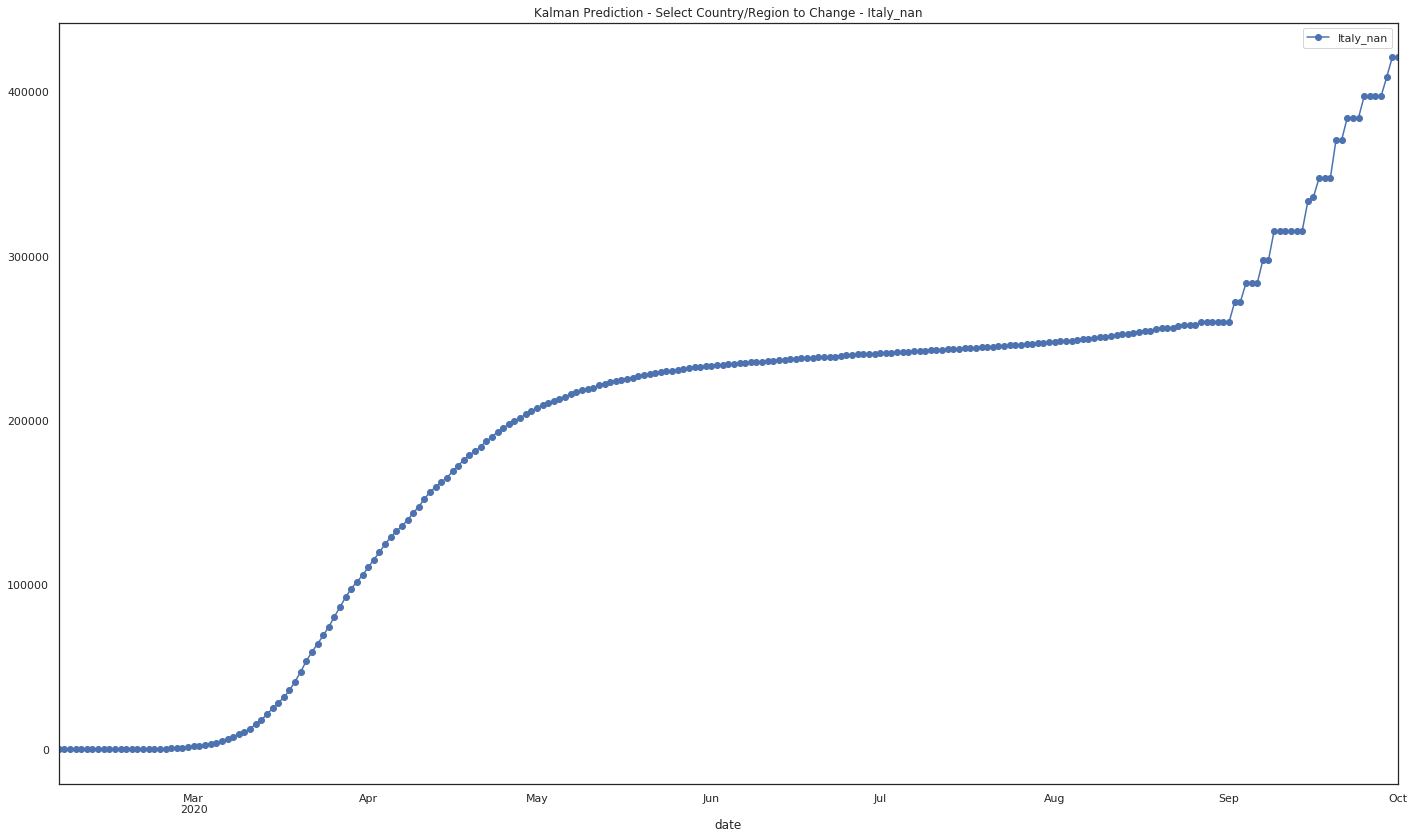

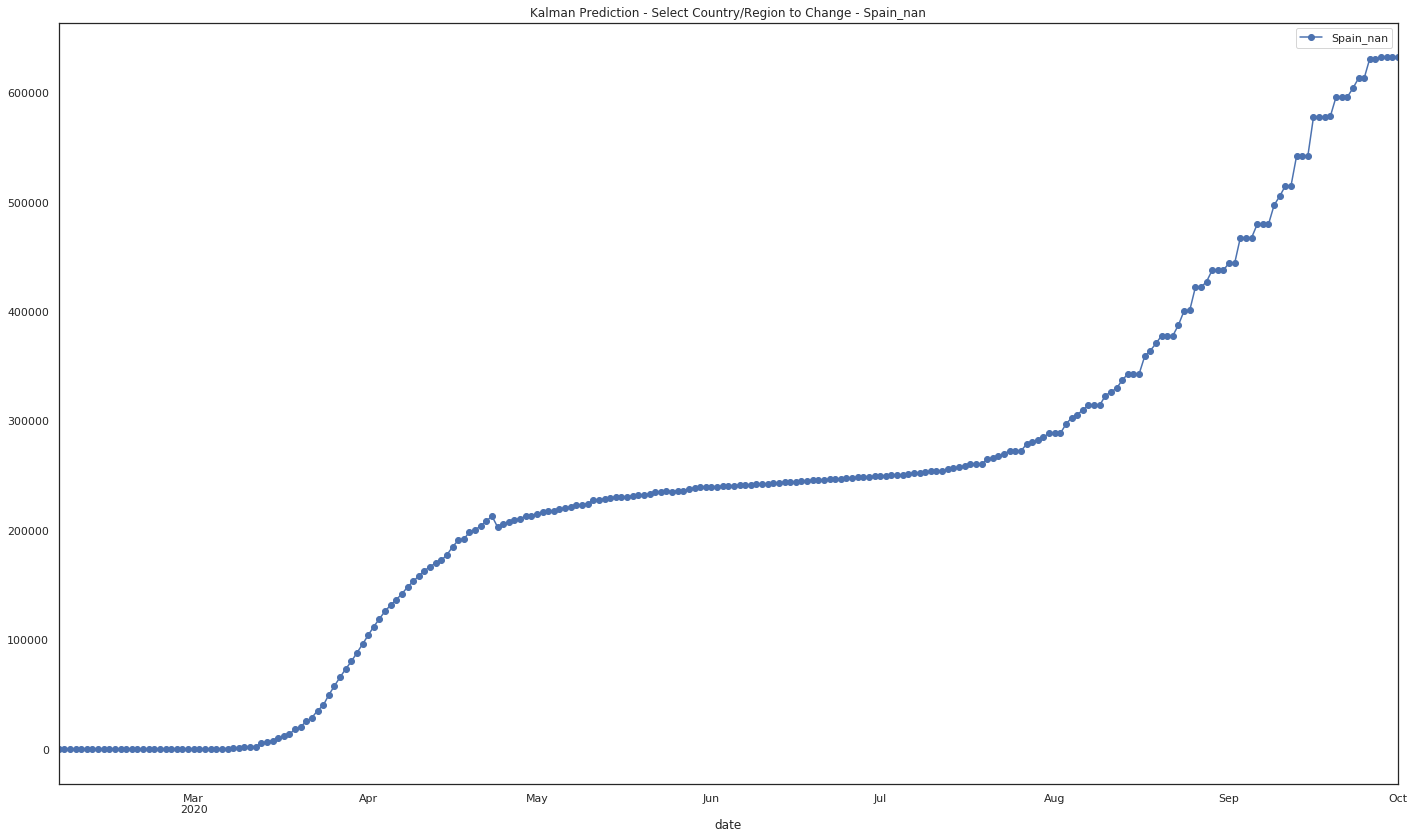

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


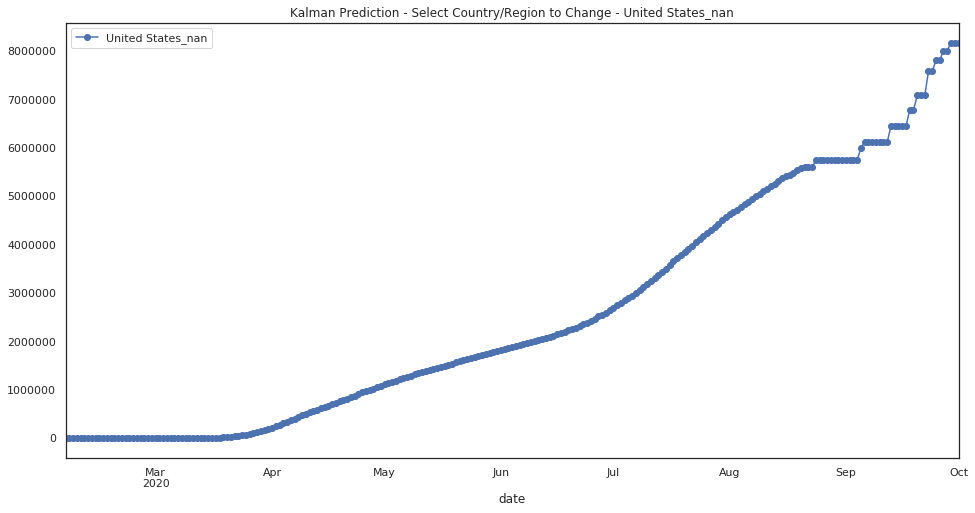

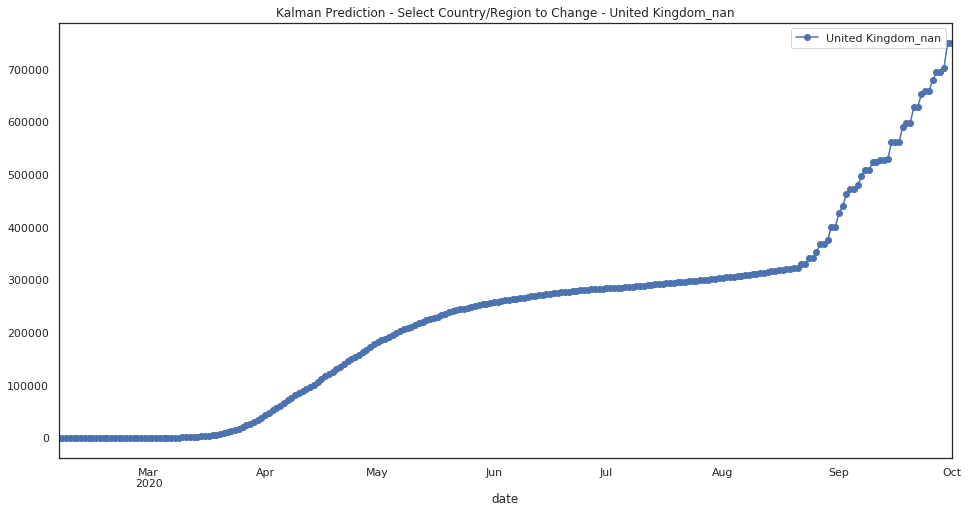

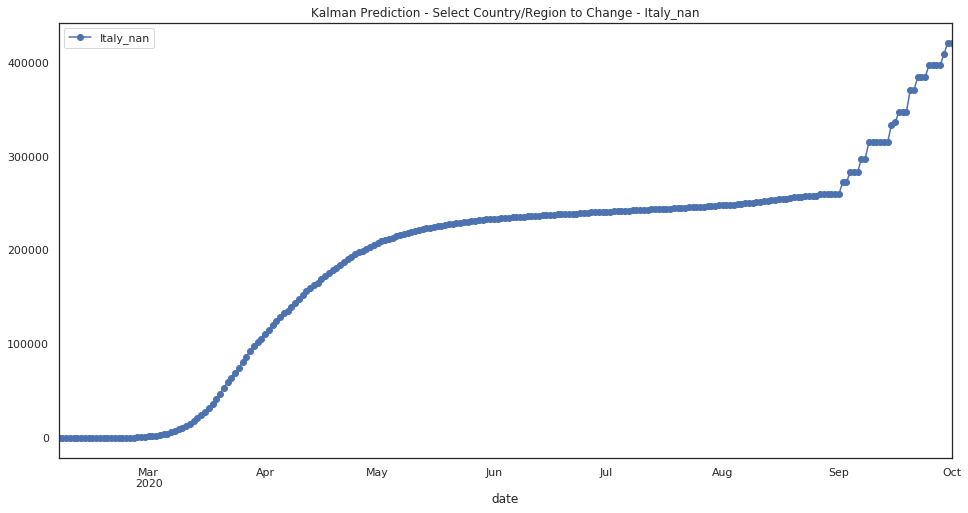

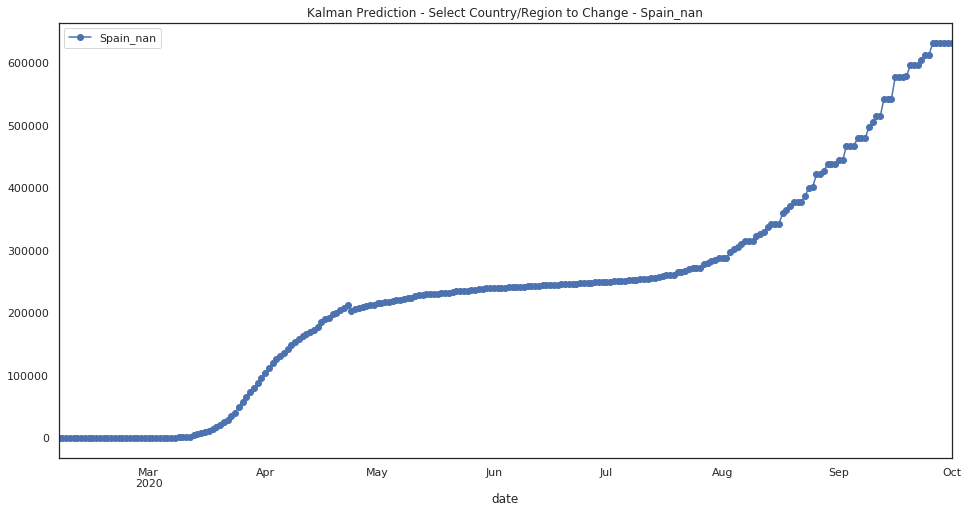

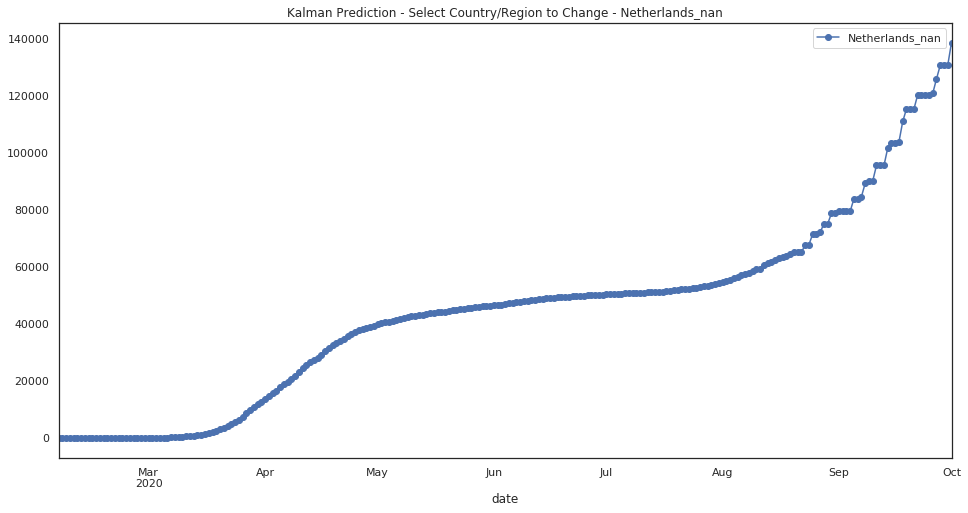

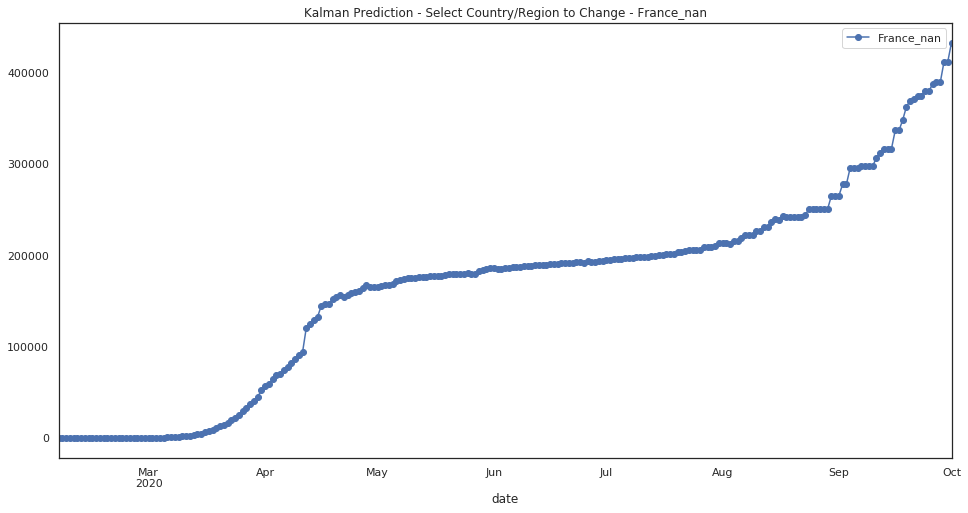

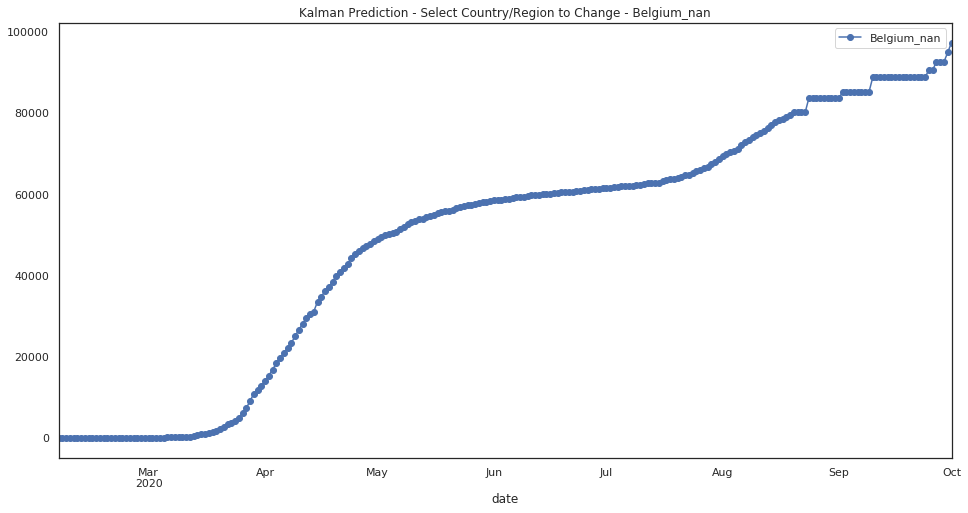

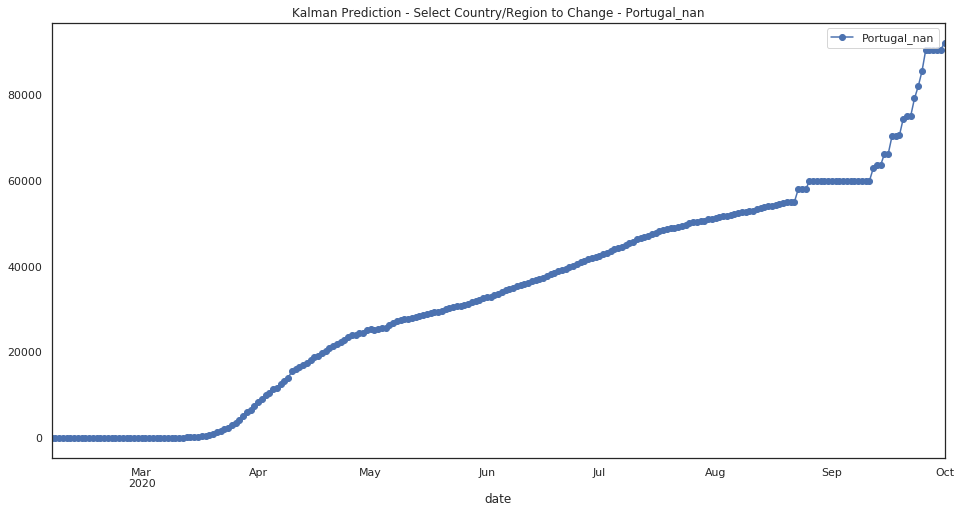

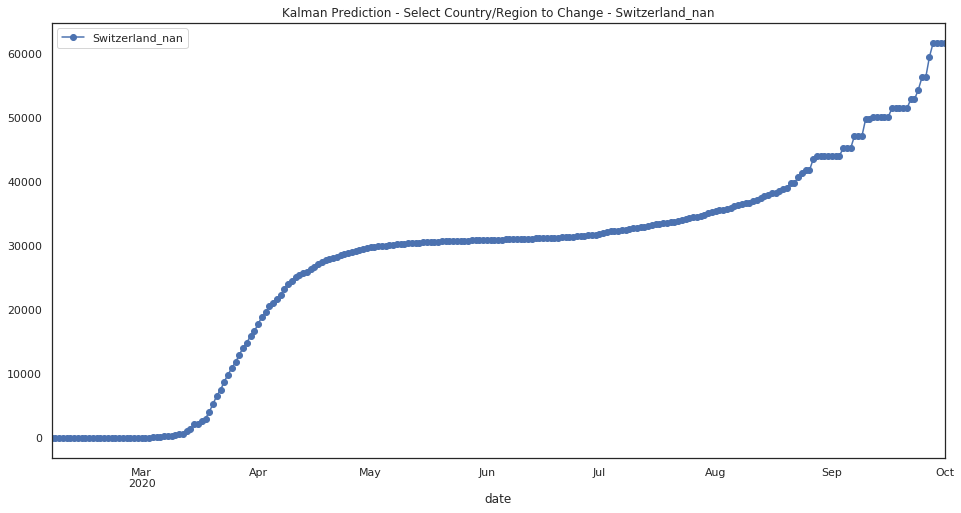

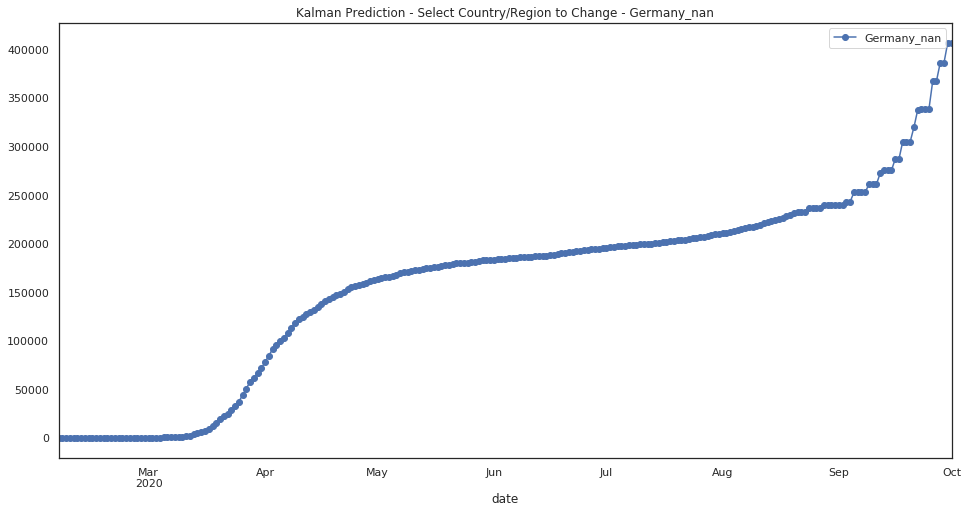

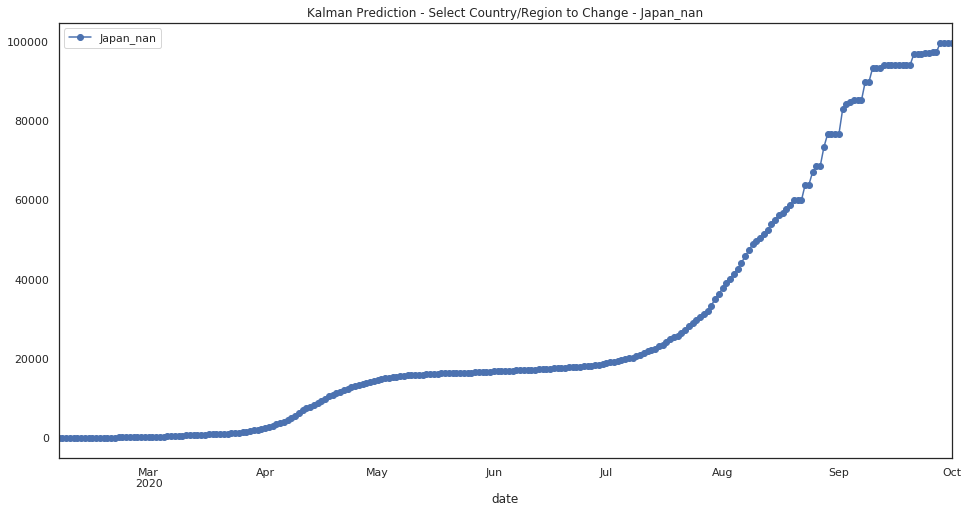

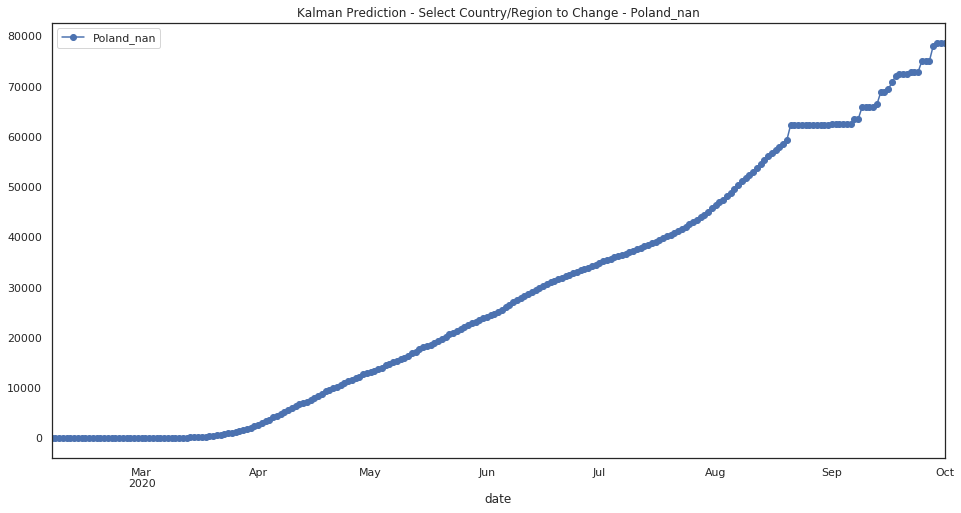

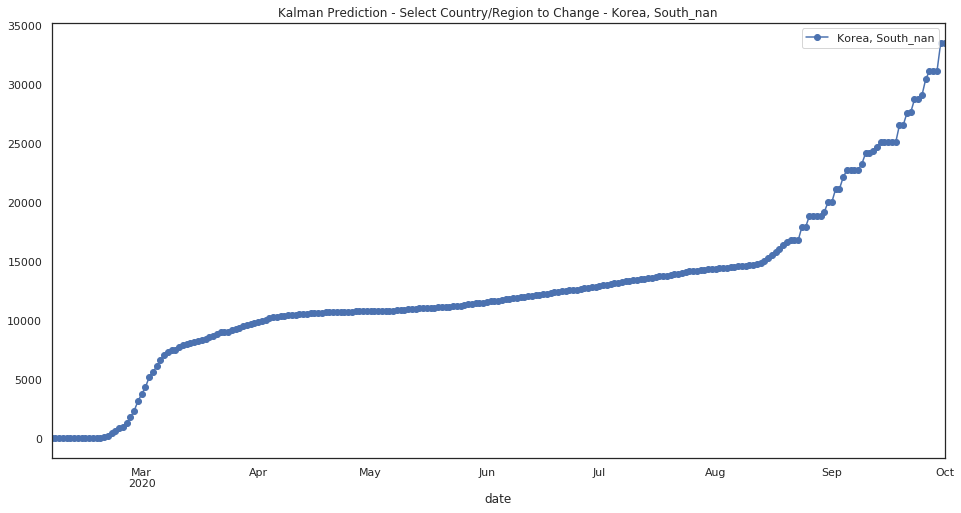

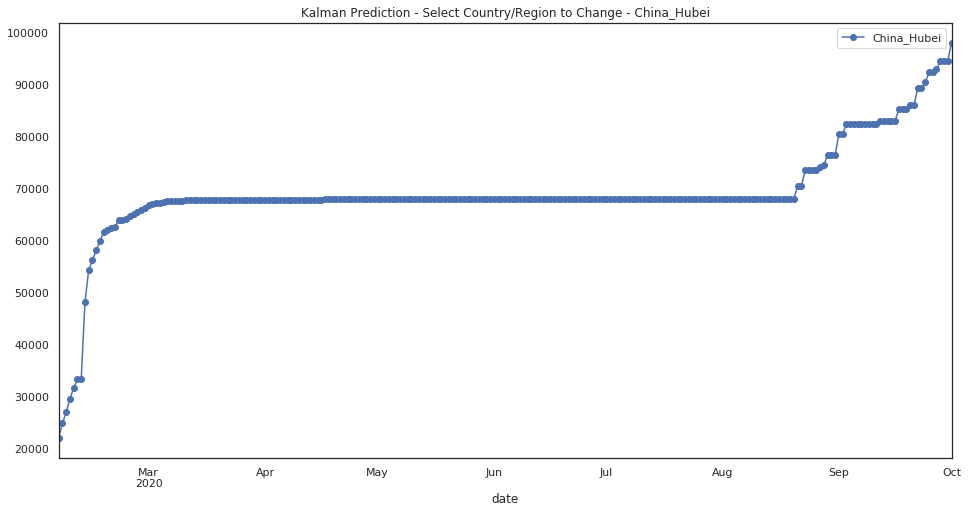

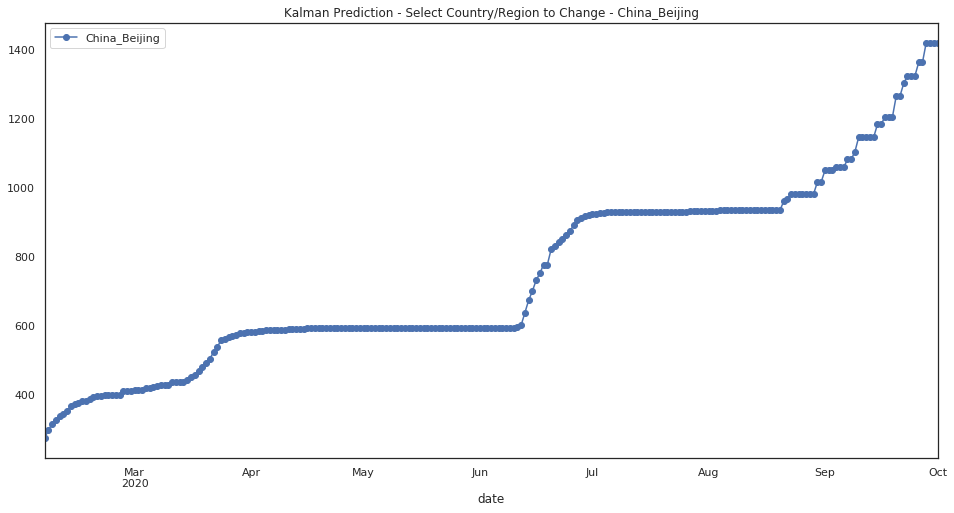

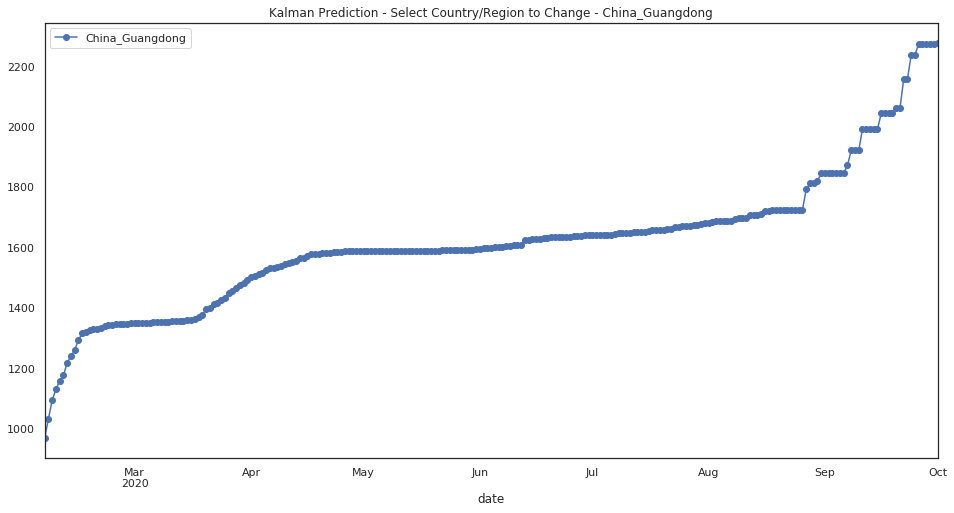

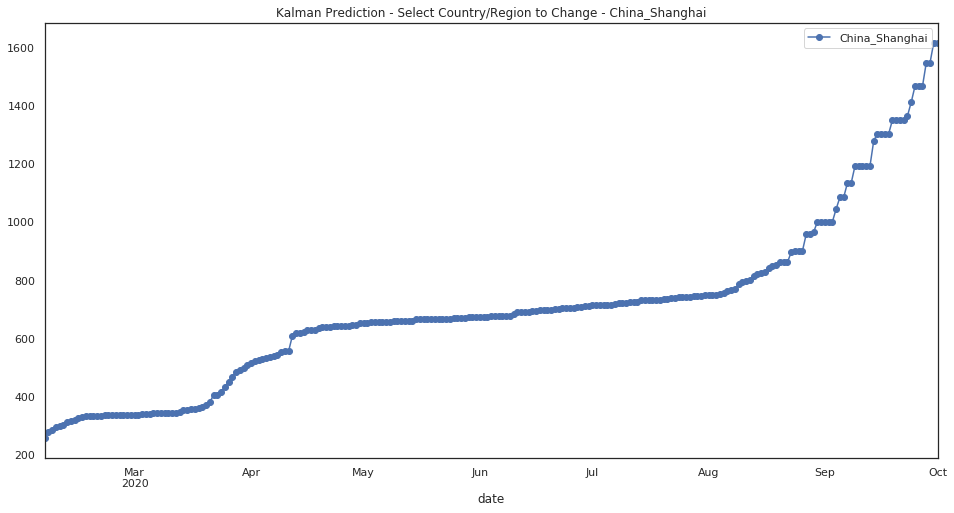

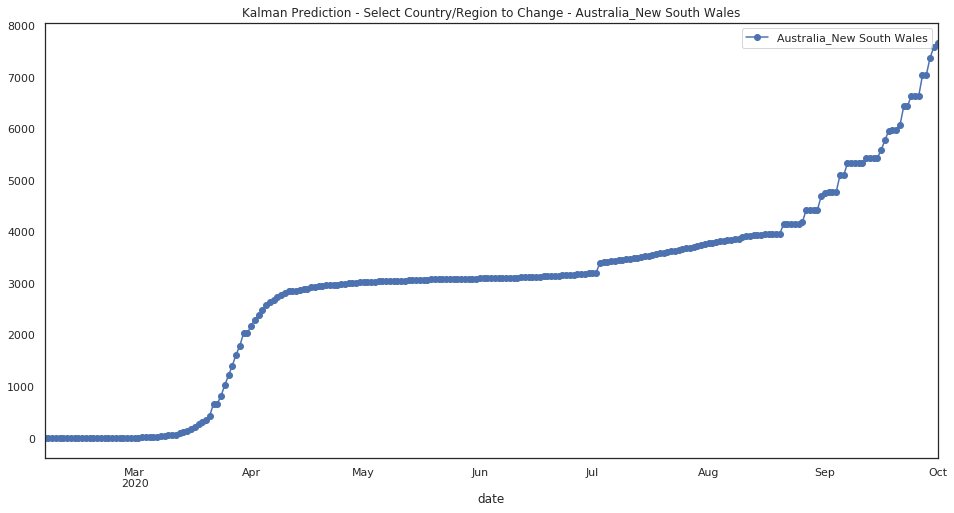

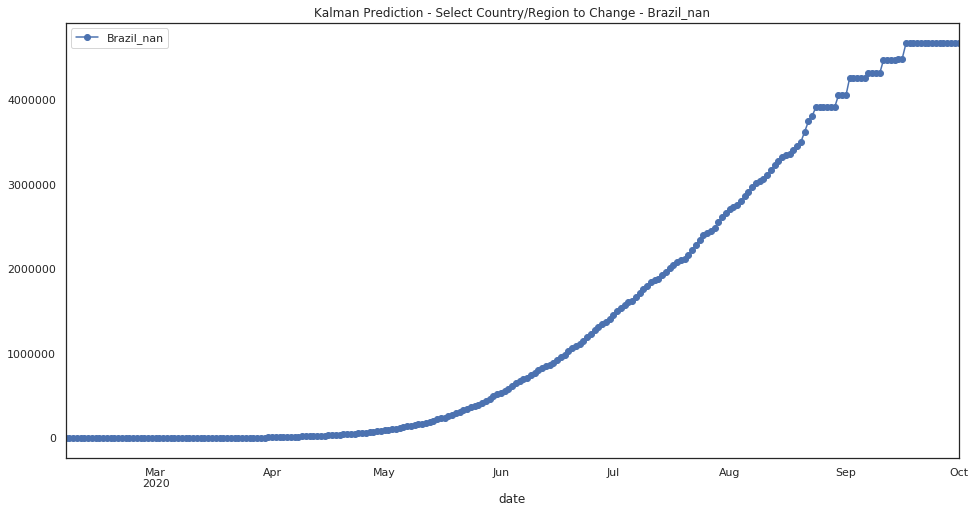

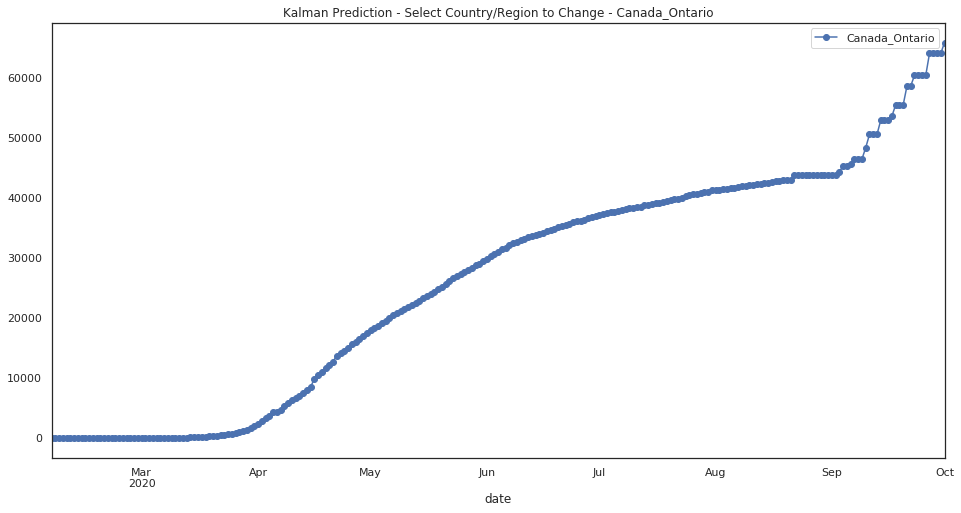

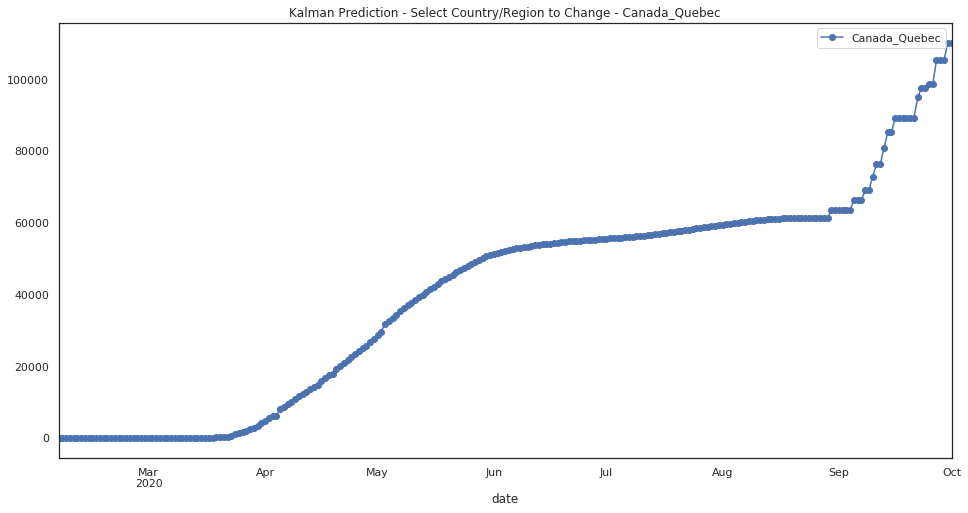

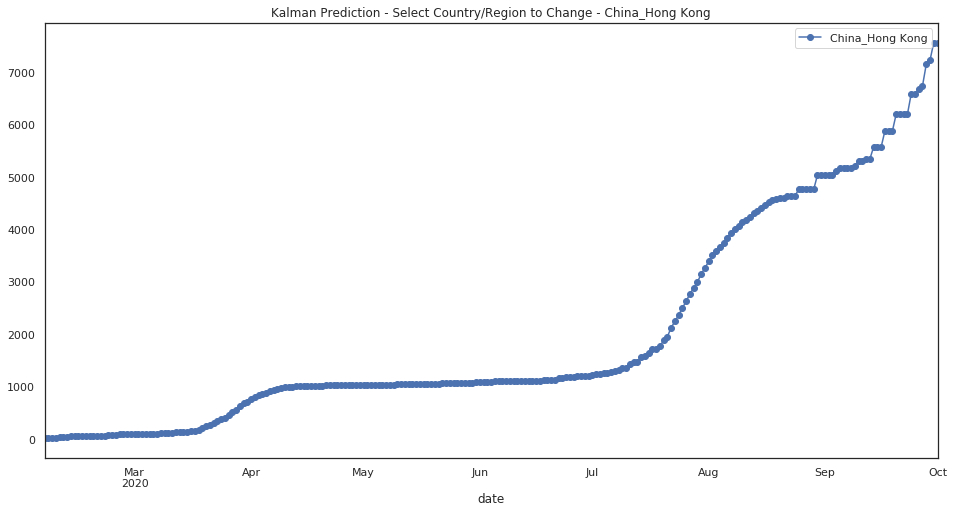

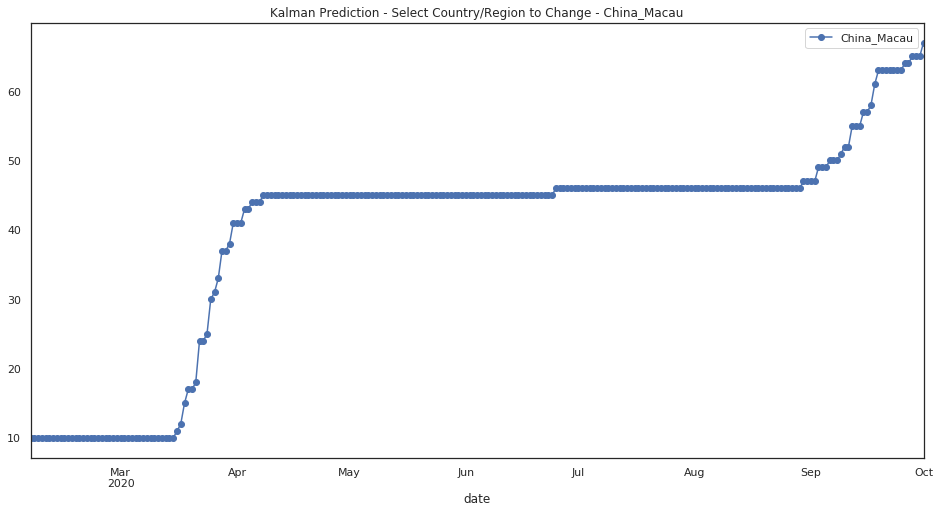

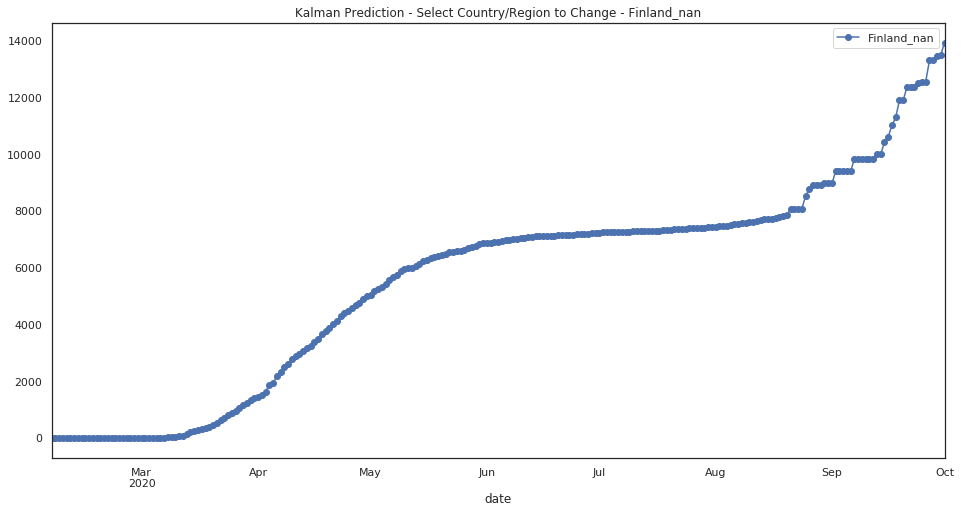

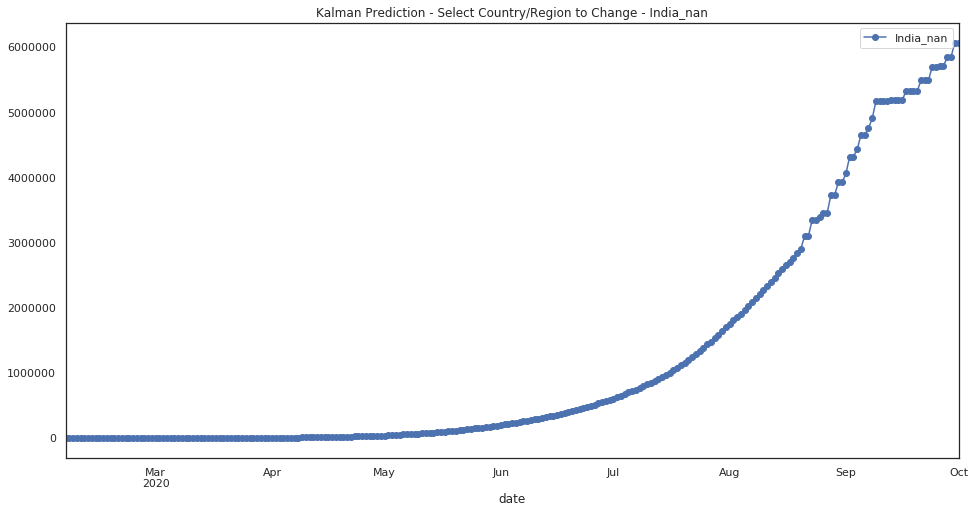

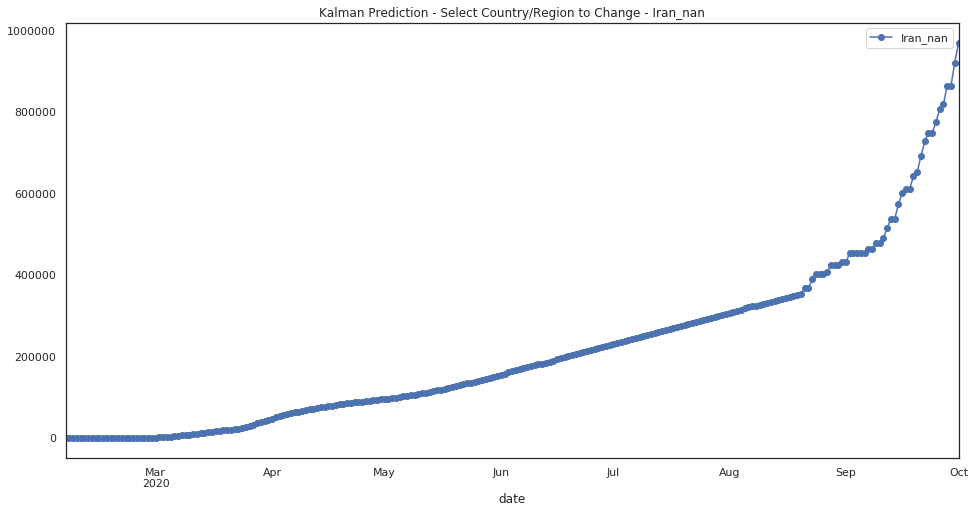

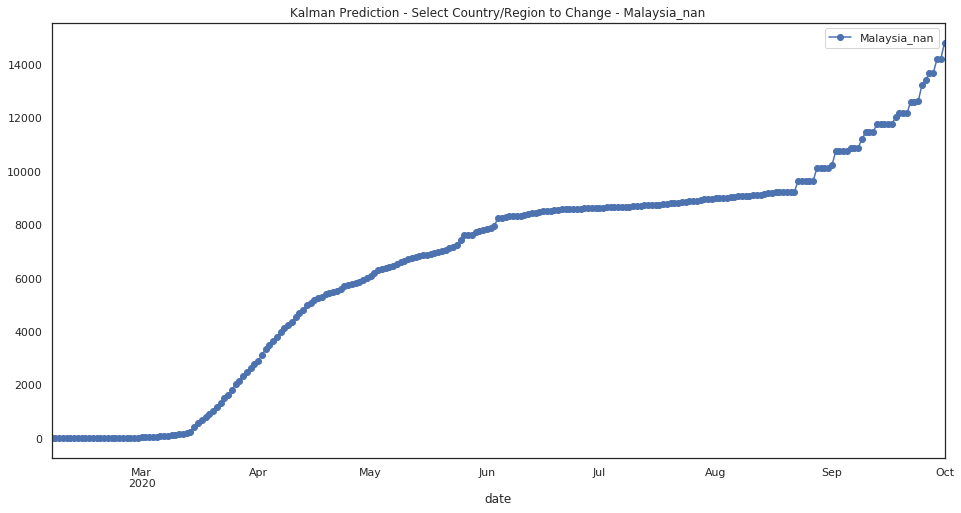

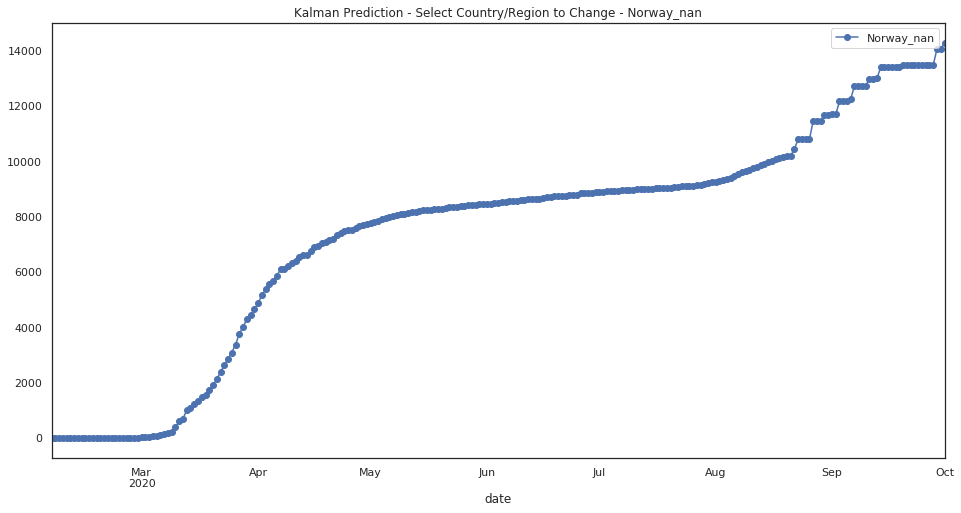

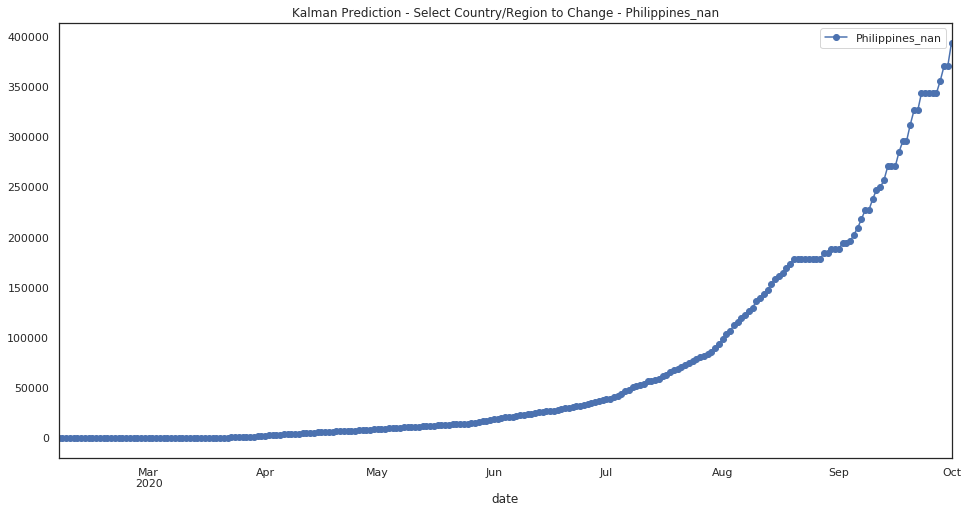

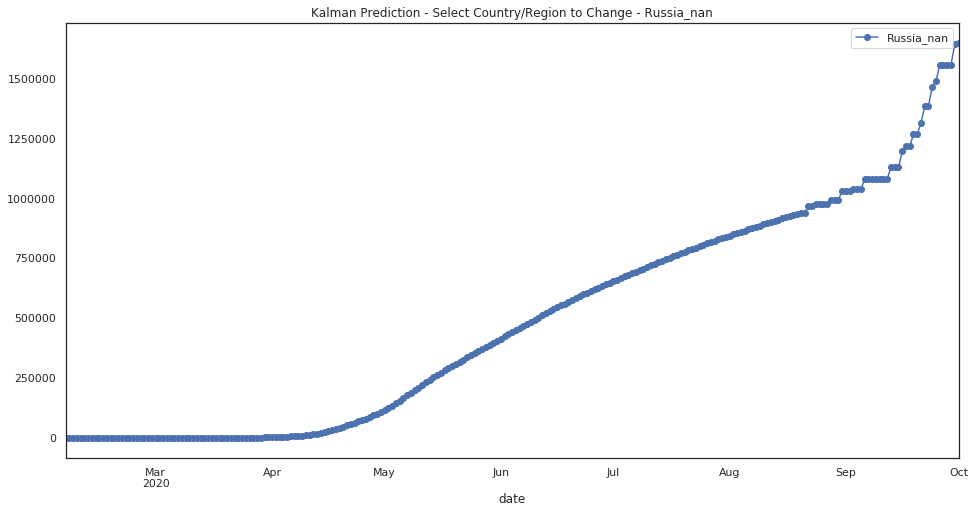

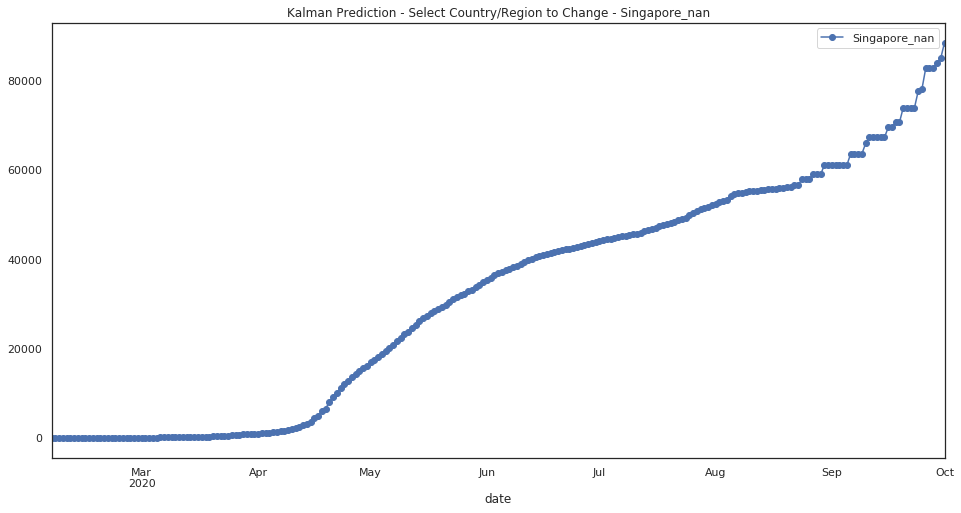

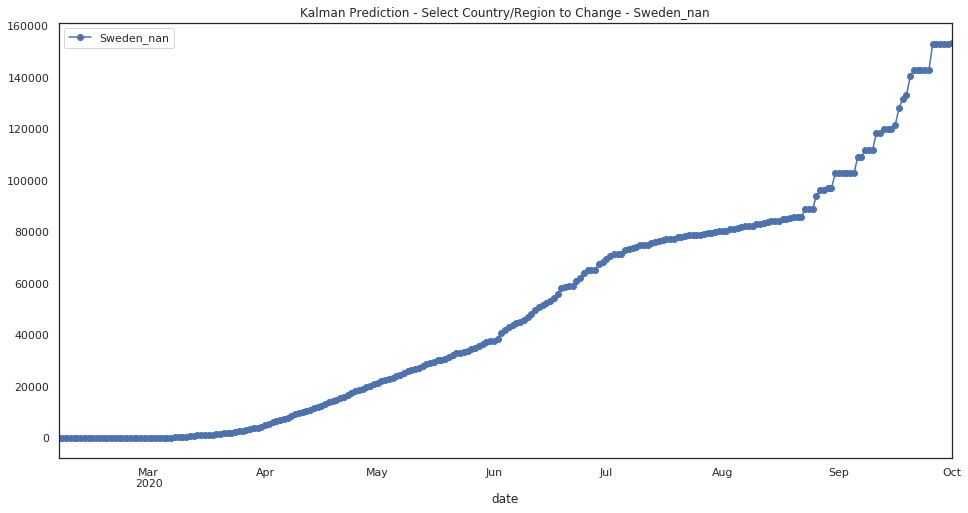

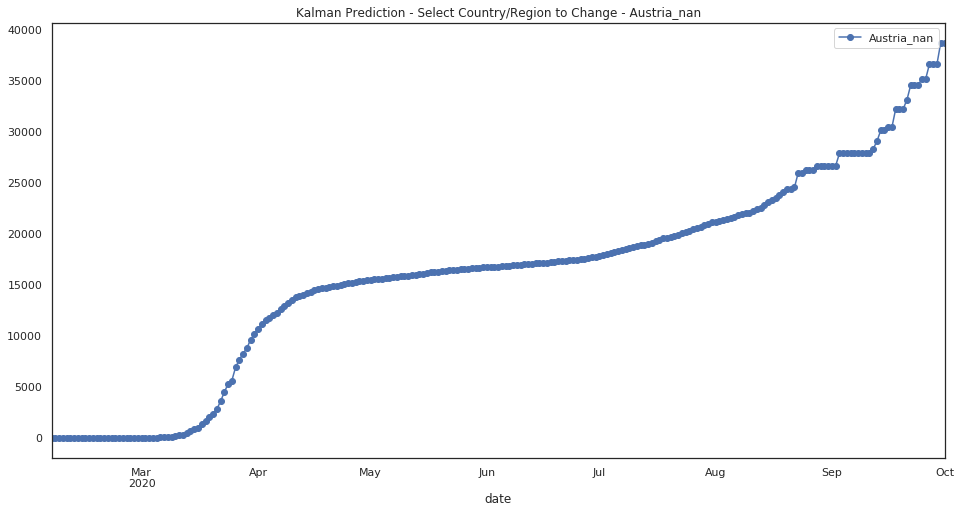

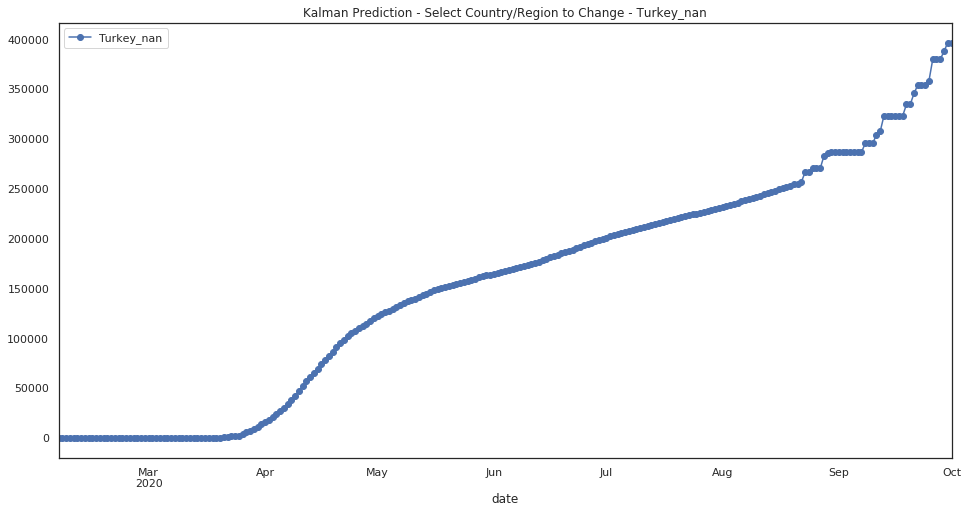

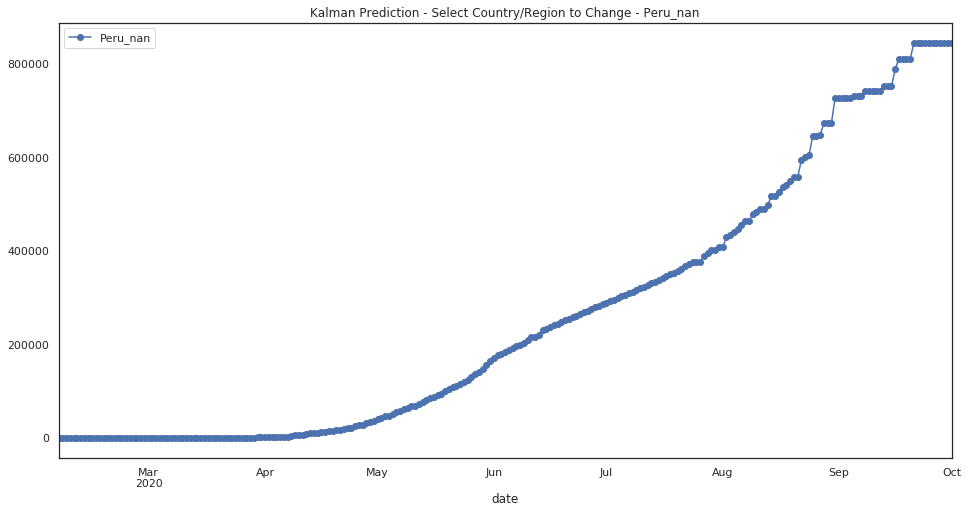

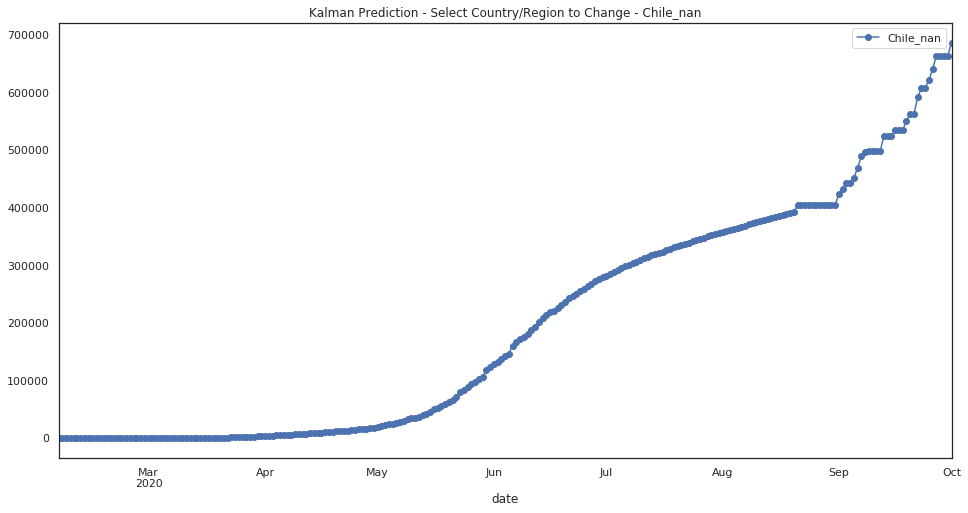

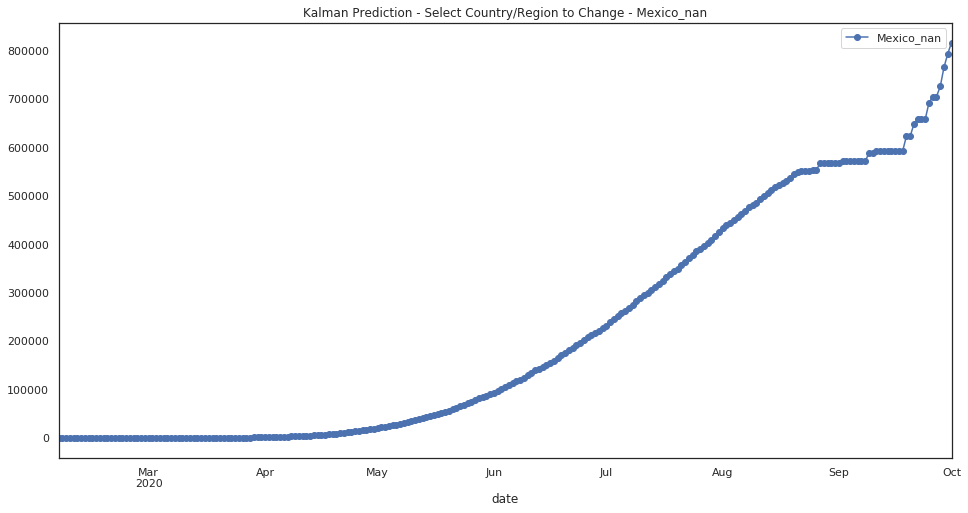

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-10-01 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       8168947.0
India_nan                                     NaN       6068310.0
Brazil_nan                                    NaN       4675387.0
Russia_nan                                    NaN       1648598.0
Colombia_nan                                  NaN       1120019.0
Iran_nan                                      NaN        969496.0
Peru_nan                                      NaN        845030.0
Mexico_nan                                    NaN        815993.0
United Kingdom_nan                            NaN        750633.0
South Africa_nan                              NaN        734461.0
Chile_nan                                     NaN        686512.0
Spain_nan                                     NaN        632470.0
Saudi Arabia_nan                              NaN        556838.0
Pakistan_nan                                  NaN        475016.0
Argentina_nan                                 NaN        446555.0
France_nan                                    NaN        433140.0
Italy_nan                                     NaN        420881.0
Germany_nan                                   NaN        407099.0
Bangladesh_nan                                NaN        405947.0
Turkey_nan                                    NaN        396669.0
Philippines_nan                               NaN        393947.0
Iraq_nan                                      NaN        381542.0
Indonesia_nan                                 NaN        234236.0
Ukraine_nan                                   NaN        231450.0
Israel_nan                                    NaN        193502.0
Kuwait_nan                                    NaN        183302.0
Panama_nan                                    NaN        179681.0
Ecuador_nan                                   NaN        174804.0
Bolivia_nan                                   NaN        172525.0
Kazakhstan_nan                                NaN        162933.0
...                                           ...             ...
Australia_Northern Territory                  NaN            80.0
Saint Vincent and the Grenadines_nan          NaN            77.0
Canada_Prince Edward Island                   NaN            76.0
China_Macau                                   NaN            67.0
Fiji_nan                                      NaN            65.0
Netherlands_Curacao                           NaN            56.0
Saint Lucia_nan                               NaN            50.0
France_New Caledonia                          NaN            49.0
Grenada_nan                                   NaN            42.0
Laos_nan                                      NaN            39.0
Timor-Leste_nan                               NaN            33.0
Dominica_nan                                  NaN            28.0
Canada_Grand Princess                         NaN            25.0
Canada_Yukon                                  NaN            25.0
United Kingdom_British Virgin Islands         NaN            23.0
China_Qinghai                                 NaN            23.0
Saint Kitts and Nevis_nan                     NaN            22.0
Denmark_Greenland                             NaN            22.0
United Kingdom_Falkland Islands (Malvinas)    NaN            22.0
United Kingdom_Montserrat                     NaN            22.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            20.0
France_Saint Barthelemy                       NaN            17.0
Holy See_nan                                  NaN            14.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
France_Saint Pierre and Miquelon              NaN             7.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06             12.0         12.0         12.0         12.0   
2020-02-07             12.0         12.0         12.0         12.0   
2020-02-08             12.0         12.0         12.0         12.0   
2020-02-09             12.0         12.0         12.0         12.0   
2020-02-10             12.0         12.0         12.0         12.0   
2020-02-11             12.0         12.0         12.0         12.0   
2020-02-12             12.0         12.0         12.0         12.0   
2020-02-13             12.0         12.0         12.0         12.0   
2020-02-14             12.0         12.0         12.0         12.0   
2020-02-15             12.0         12.0         12.0         12.0   
2020-02-16             12.0         12.0         12.0         12.0   
2020-02-17             12.0         12.0         12.0         12.0   
2020-02-18             30.0         12.0         40.0         12.0   
2020-02-19             24.0         12.0         42.0         12.0   
2020-02-20             27.0         12.0         43.0         12.0   
2020-02-21             30.0         12.0         44.0         12.0   
2020-02-22             32.0         12.0         43.0         12.0   
2020-02-23             33.0         12.0         41.0         12.0   
2020-02-24             36.0         12.0         40.0         12.0   
2020-02-25             37.0         12.0         43.0         12.0   
2020-02-26             15.0         12.0         43.0         12.0   
2020-02-27             30.0         12.0         34.0         12.0   
2020-02-28             18.0         12.0         34.0         12.0   
2020-02-29             19.0         12.0         37.0         12.0   
2020-03-01             21.0         12.0         39.0         12.0   
2020-03-02             23.0         12.0         38.0         11.0   
2020-03-03             24.0         12.0         27.0         13.0   
2020-03-04             18.0         12.0         49.0          3.0   
2020-03-05             16.0         12.0         84.0          3.0   
2020-03-06             18.0         12.0         72.0          6.0   
...                     ...          ...          ...          ...   
2020-09-03          41416.0       8632.0      44327.0       1209.0   
2020-09-04          40738.0       8898.0      48475.0       1209.0   
2020-09-05          41668.0       9413.0      47744.0       1209.0   
2020-09-06          41963.0       9250.0      49006.0       1209.0   
2020-09-07          41961.0       9354.0      48948.0       1203.0   
2020-09-08          42058.0       9530.0      51193.0       1203.0   
2020-09-09          41369.0      10392.0      50476.0       1196.0   
2020-09-10          42713.0      10165.0      52561.0       1248.0   
2020-09-11          44848.0      10640.0      50751.0       1237.0   
2020-09-12          45023.0      10583.0      54255.0       1229.0   
2020-09-13          45245.0      10459.0      52790.0       1269.0   
2020-09-14          44988.0      10912.0      56999.0       1263.0   
2020-09-15          47715.0      10937.0      59675.0       1246.0   
2020-09-16          46754.0      11444.0      59014.0       1307.0   
2020-09-17          47738.0      11372.0      57953.0       1326.0   
2020-09-18          47850.0      11225.0      64544.0       1305.0   
2020-09-19          50422.0      11800.0      62804.0       1412.0   
2020-09-20          52189.0      11713.0      61983.0       1392.0   
2020-09-21          51997.0      11461.0      65029.0       1392.0   
2020-09-22          51218.0      12530.0      62755.0       1390.0   
2020-09-23          54954.0      12186.0      67509.0       1448.0   
2020-09-24          54033.0      12186.0      70870.0       1403.0   
2020-09-25          53806.0      12117.0      69136.0       1505.0   
2020-09-26          52789.0      12983.0      70109.0       1560.0   
2020-09-27

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'Colombia_nan',
 'Iran_nan',
 'Peru_nan',
 'Mexico_nan',
 'United Kingdom_nan',
 'South Africa_nan',
 'Chile_nan',
 'Spain_nan',
 'Saudi Arabia_nan',
 'Pakistan_nan',
 'Argentina_nan',
 'France_nan',
 'Italy_nan',
 'Germany_nan',
 'Bangladesh_nan',
 'Turkey_nan',
 'Philippines_nan',
 'Iraq_nan',
 'Indonesia_nan',
 'Ukraine_nan',
 'Israel_nan',
 'Kuwait_nan',
 'Panama_nan',
 'Ecuador_nan',
 'Bolivia_nan',
 'Kazakhstan_nan',
 'Sweden_nan',
 'Qatar_nan',
 'Honduras_nan',
 'Dominican Republic_nan',
 'Egypt_nan',
 'Oman_nan',
 'Netherlands_nan',
 'United Arab Emirates_nan',
 'Morocco_nan',
 'Guatemala_nan',
 'Belarus_nan',
 'Canada_Quebec',
 'Romania_nan',
 'Japan_nan',
 'China_Hubei',
 'Belgium_nan',
 'Venezuela_nan',
 'Portugal_nan',
 'Bahrain_nan',
 'Singapore_nan',
 'Poland_nan',
 'Algeria_nan',
 'Nigeria_nan',
 'Ghana_nan',
 'Serbia_nan',
 'Canada_Ontario',
 'Armenia_nan',
 'Kyrgyzstan_nan',
 'Switzerland_nan',
 'Ethiop

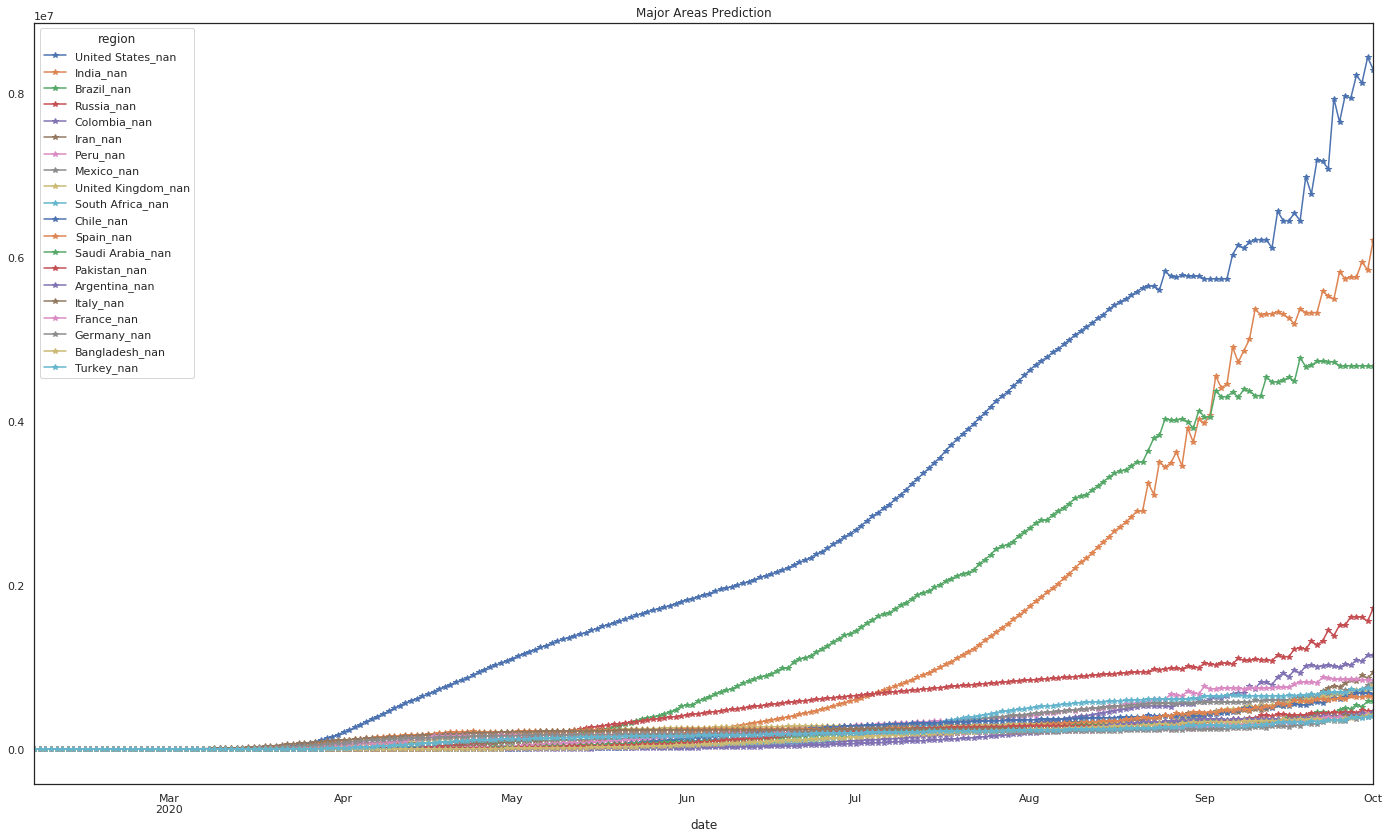

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

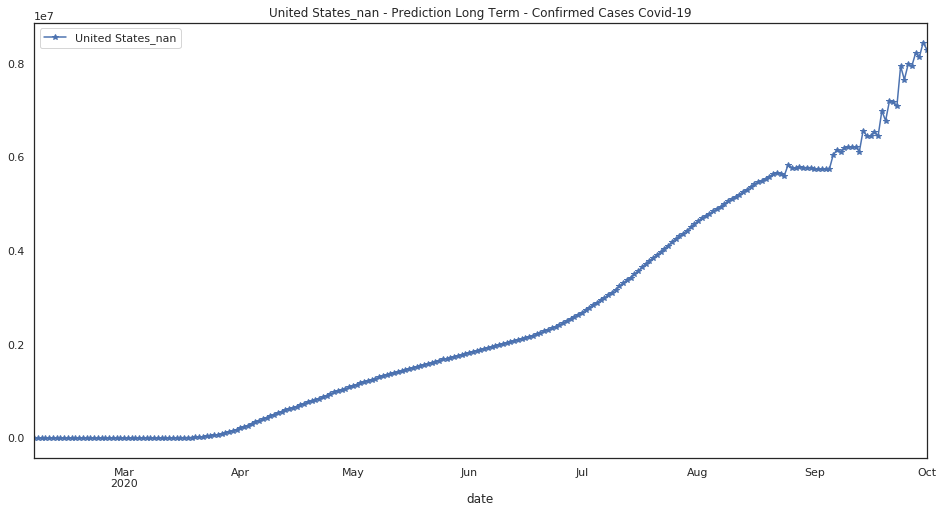

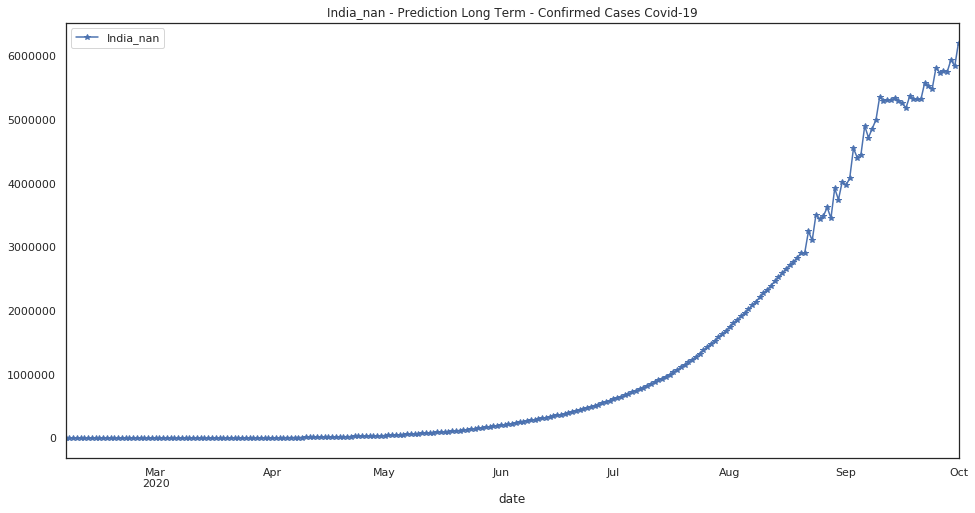

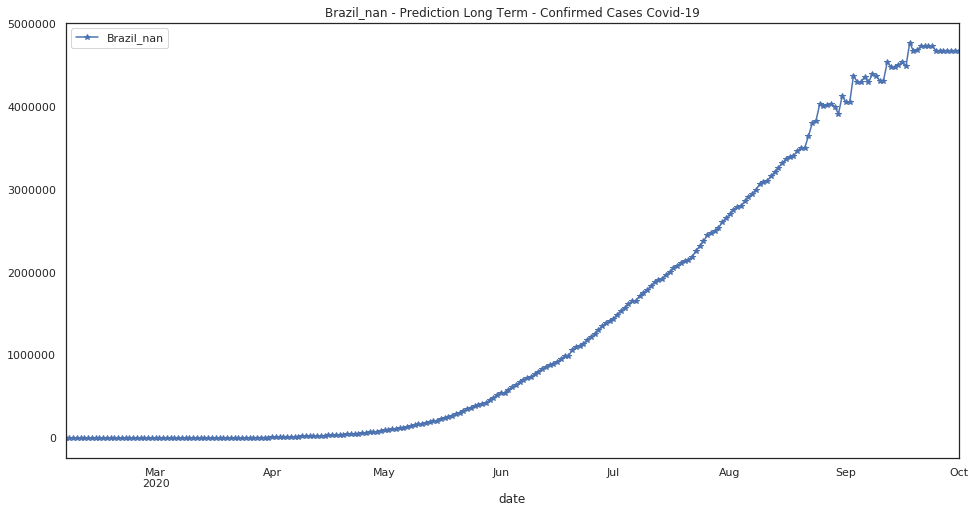

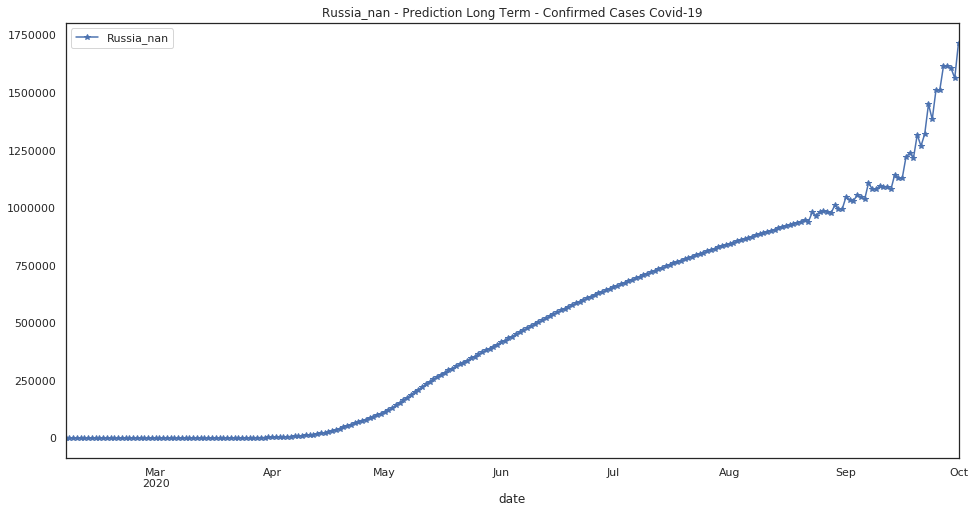

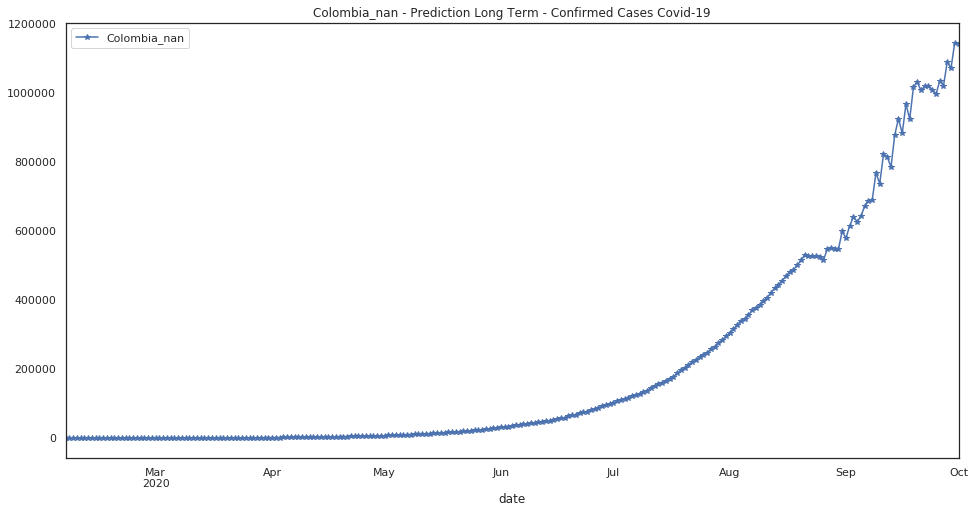

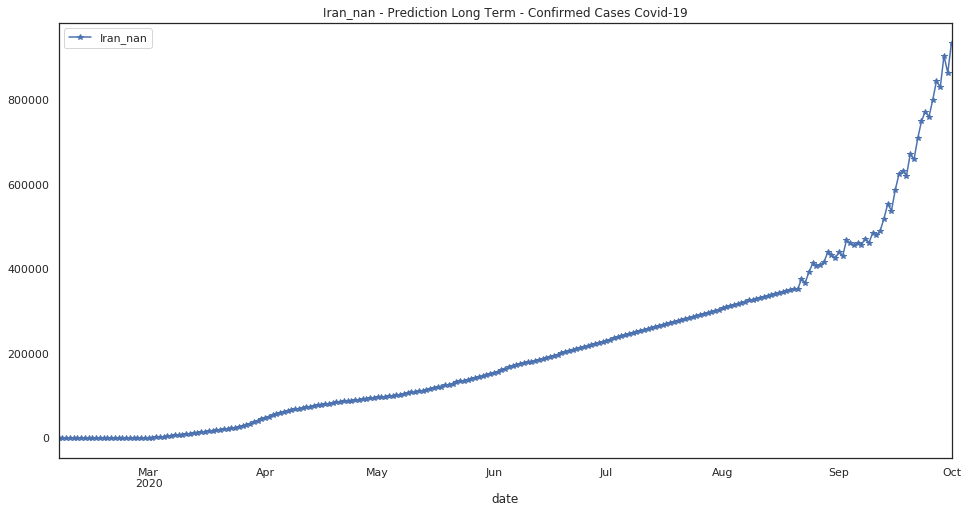

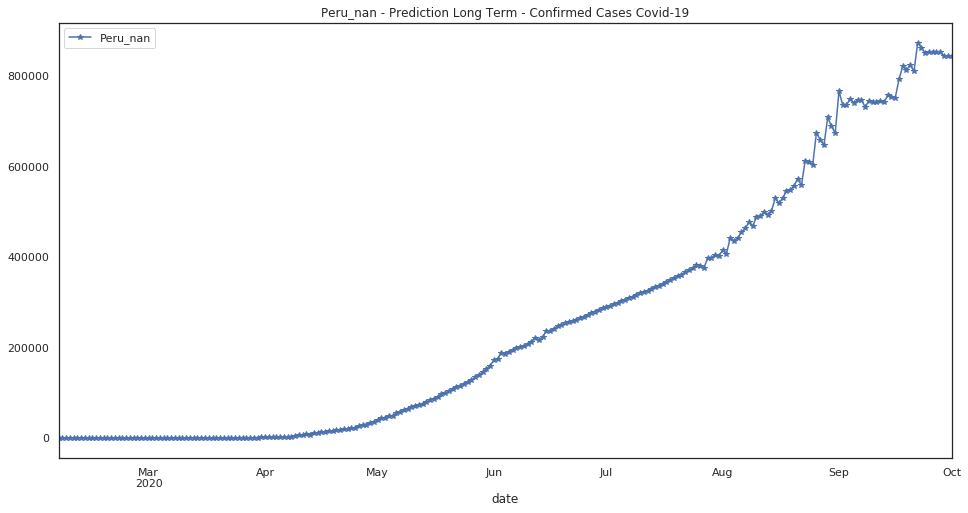

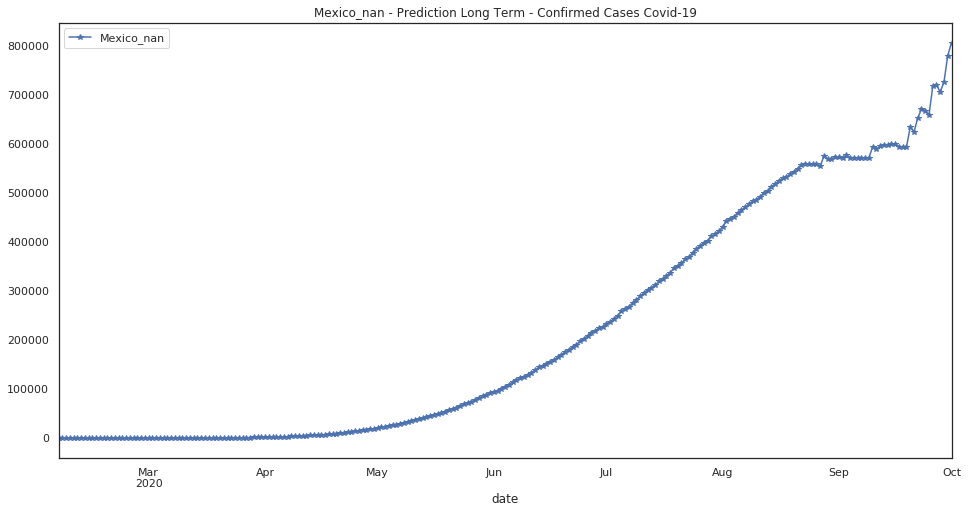

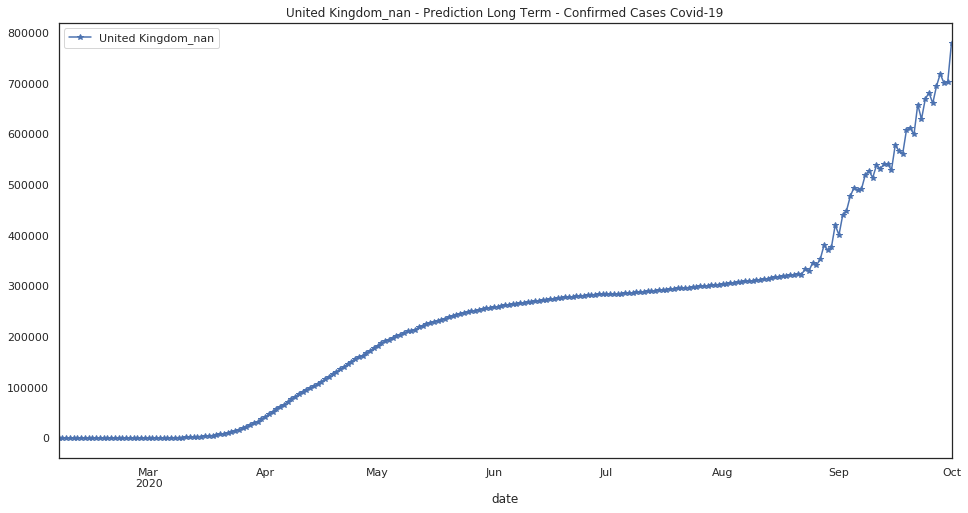

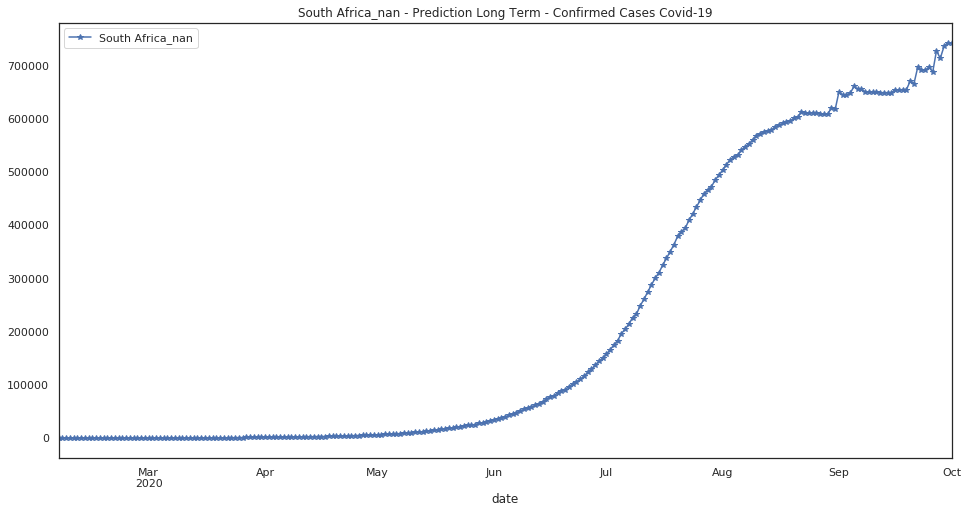

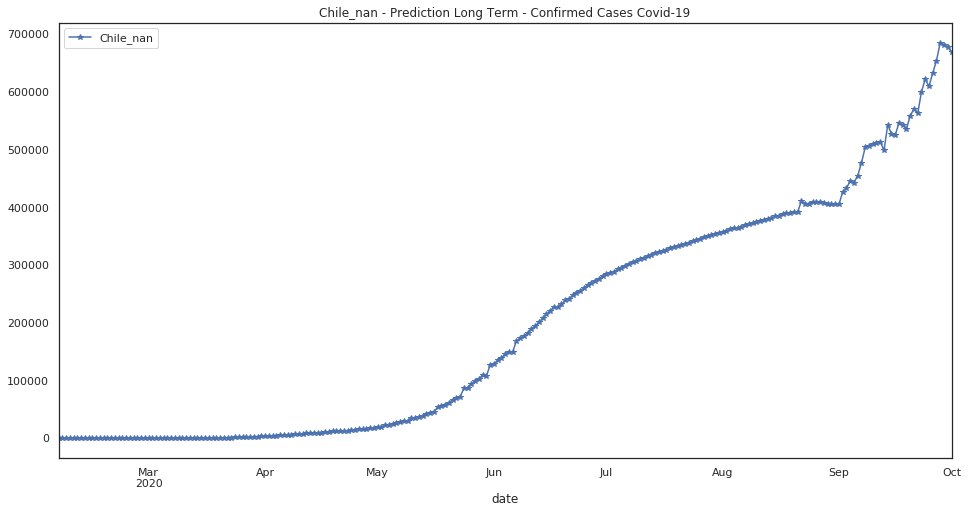

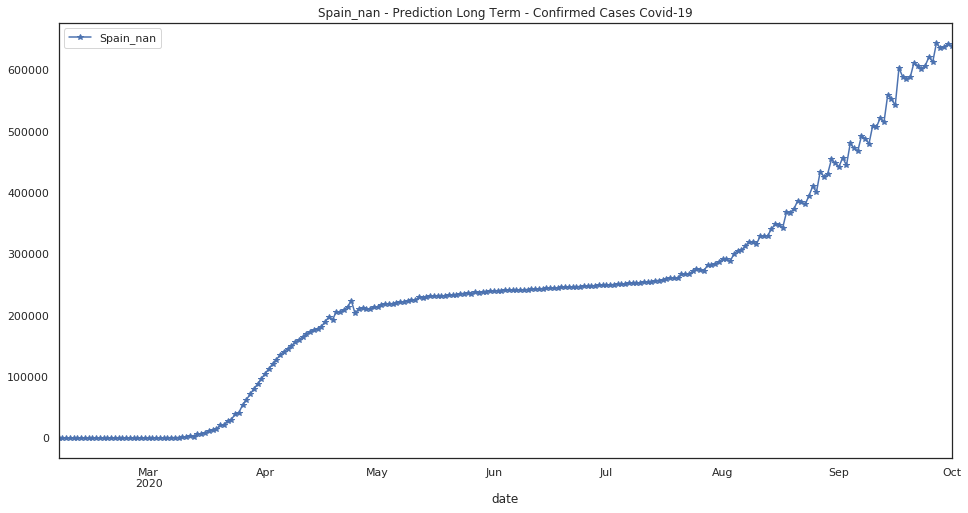

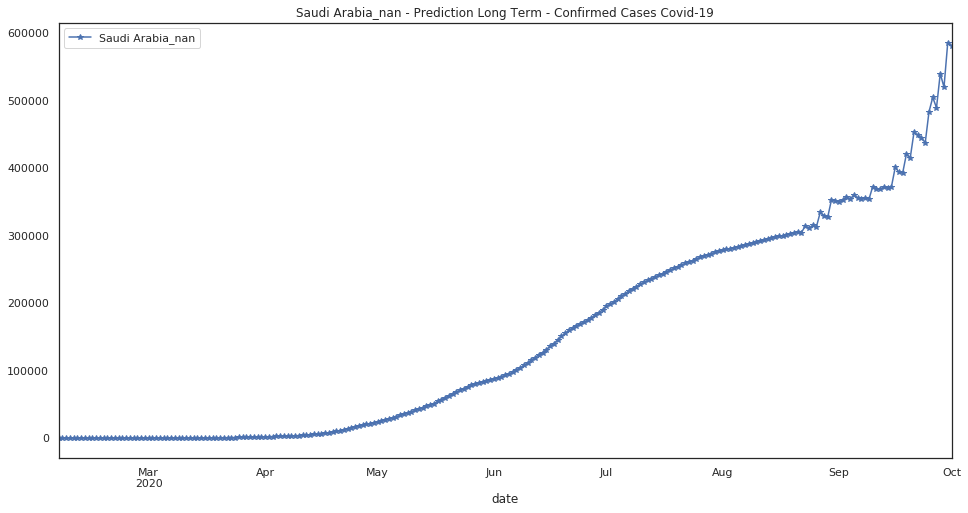

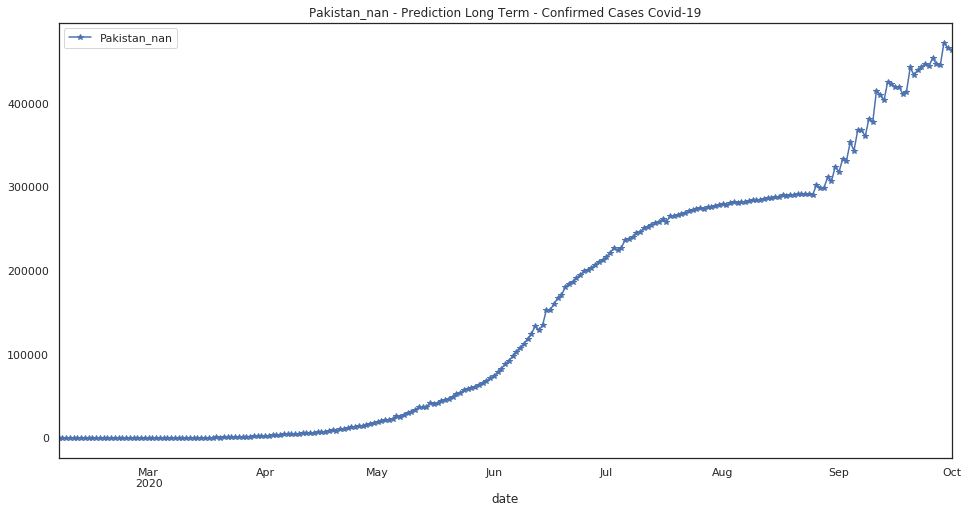

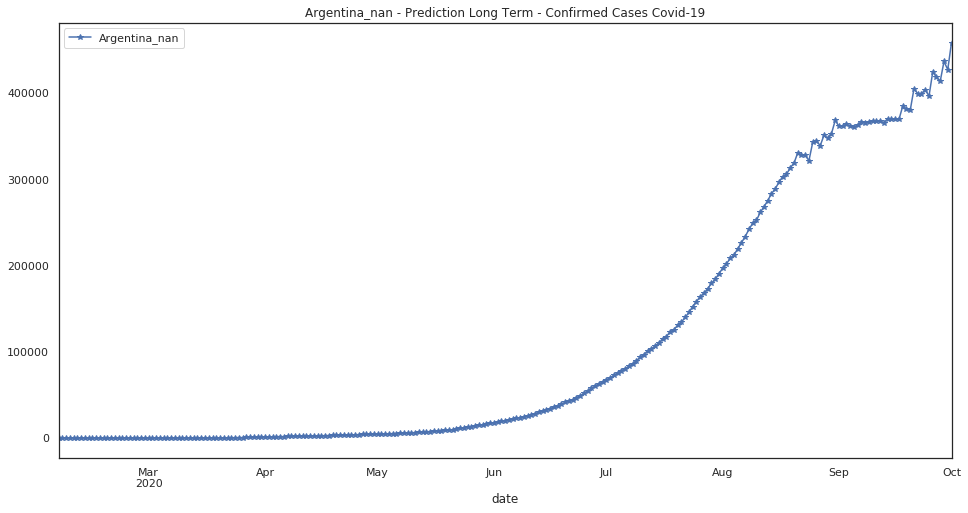

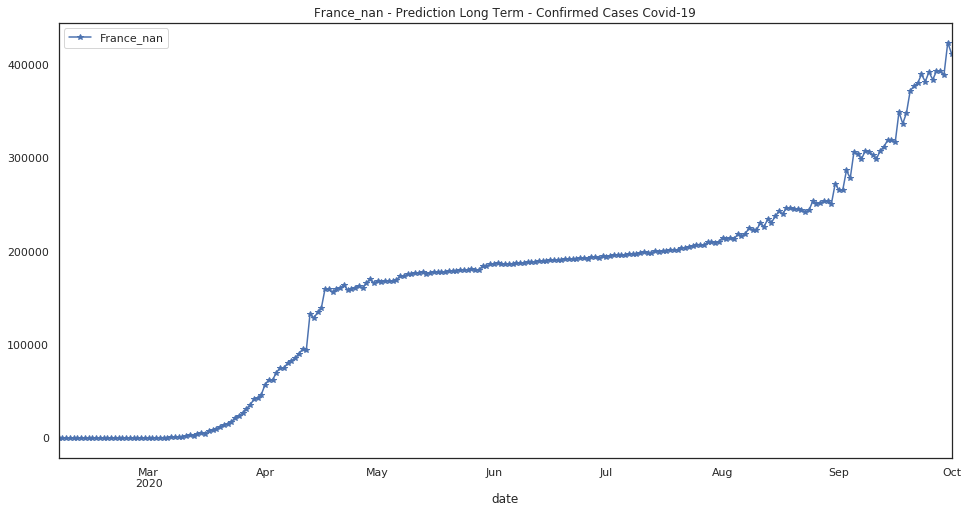

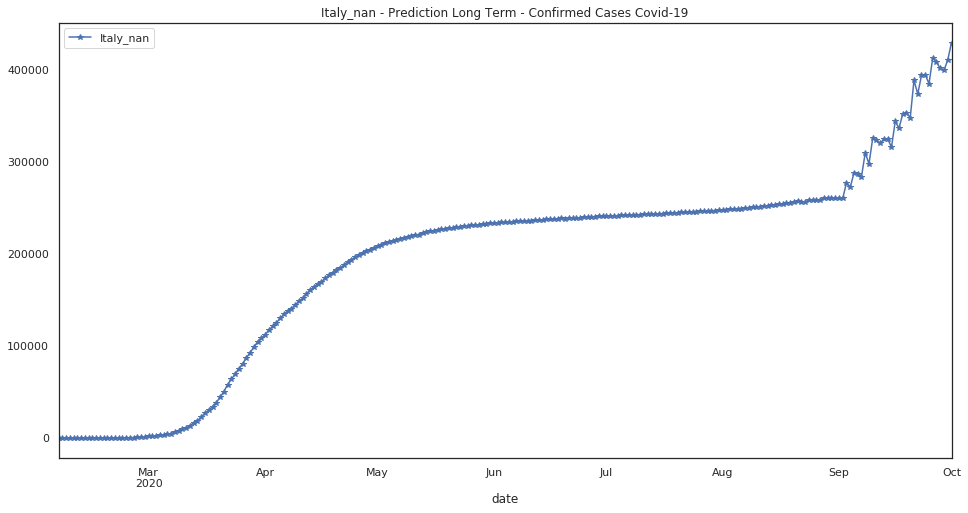

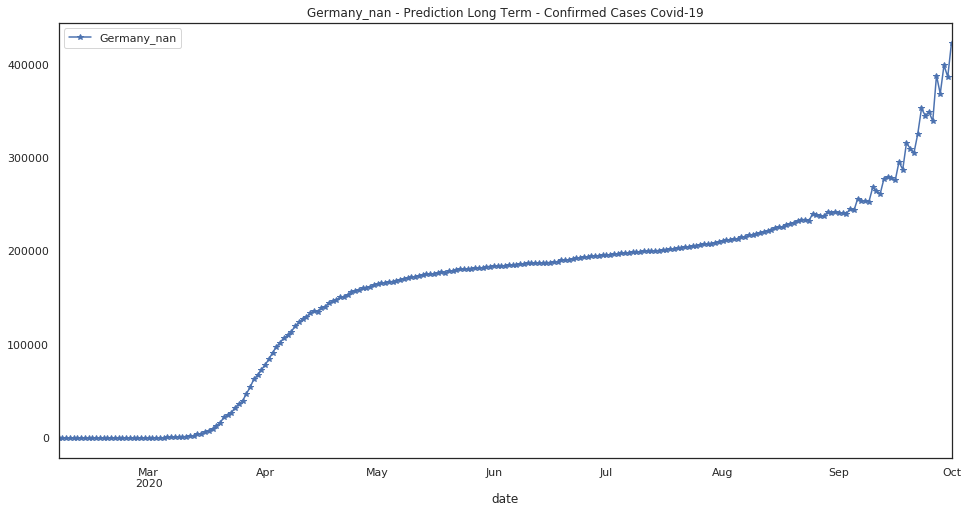

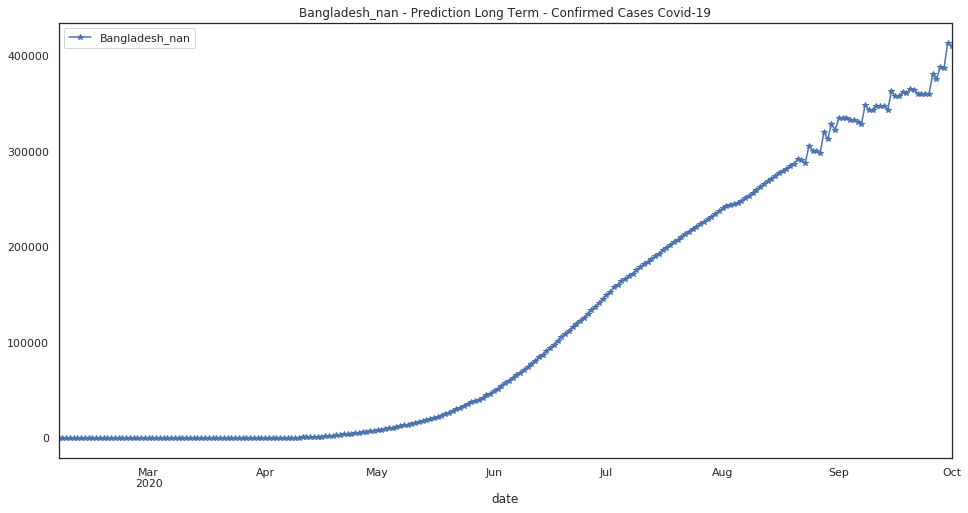

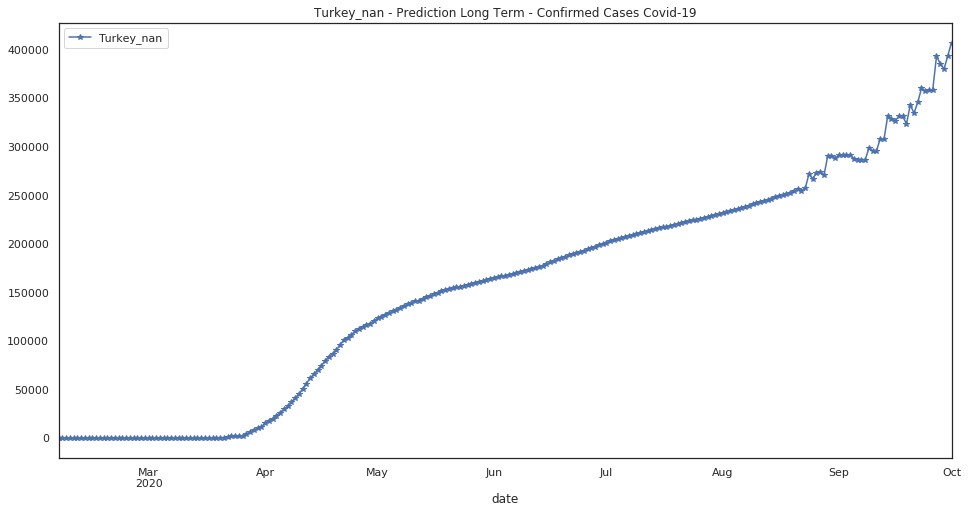

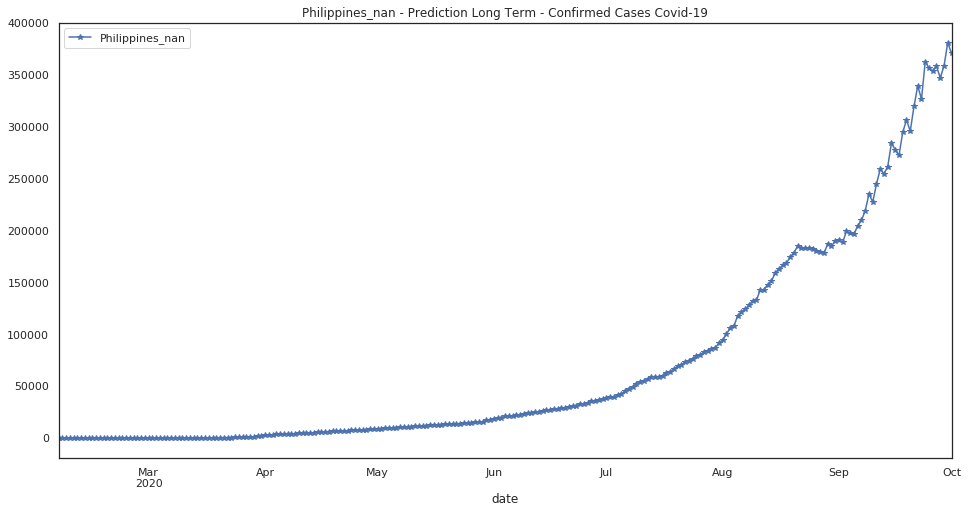

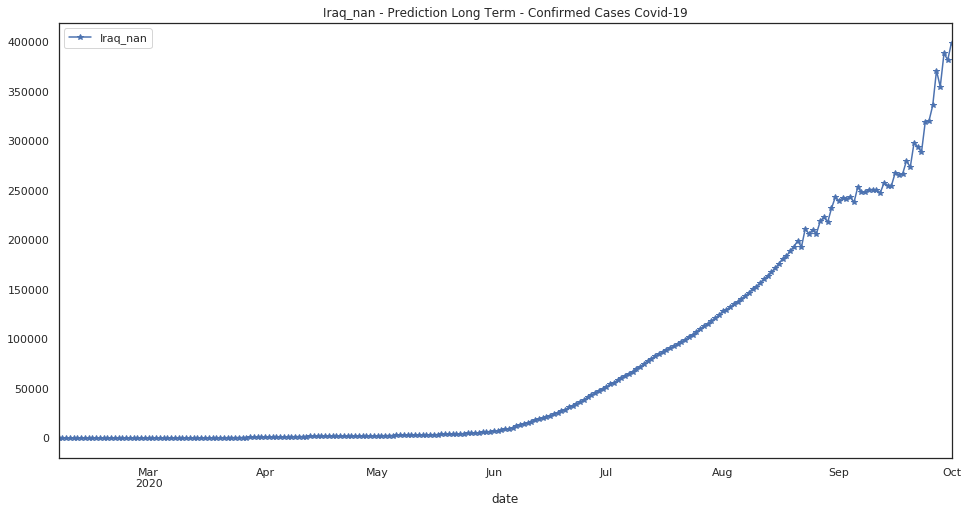

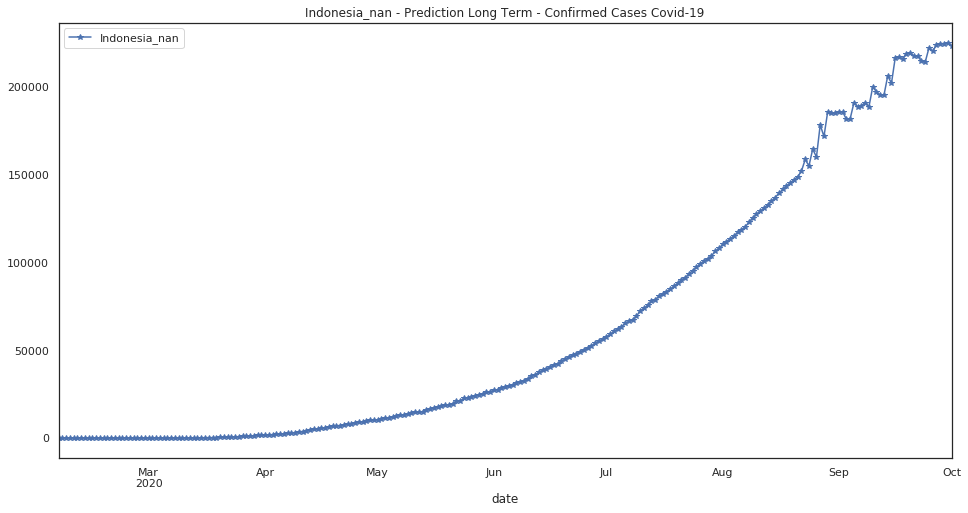

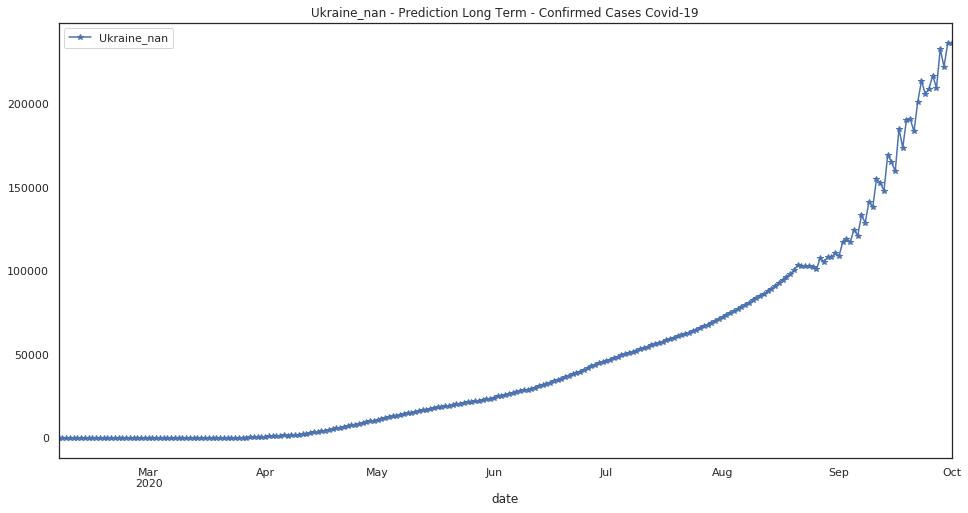

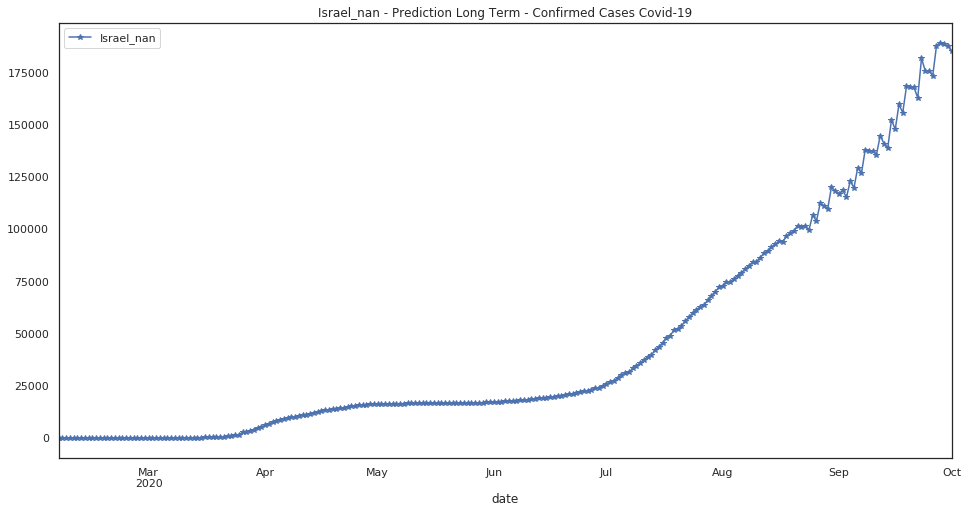

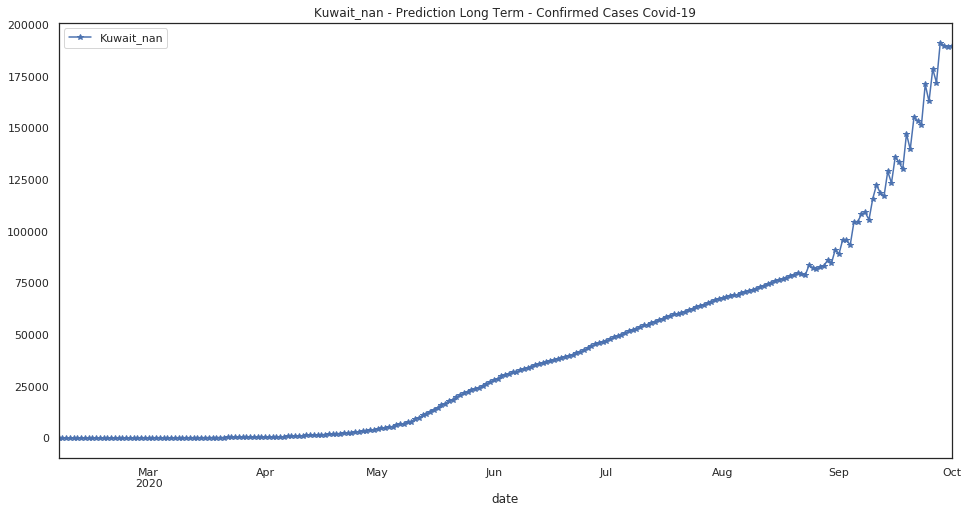

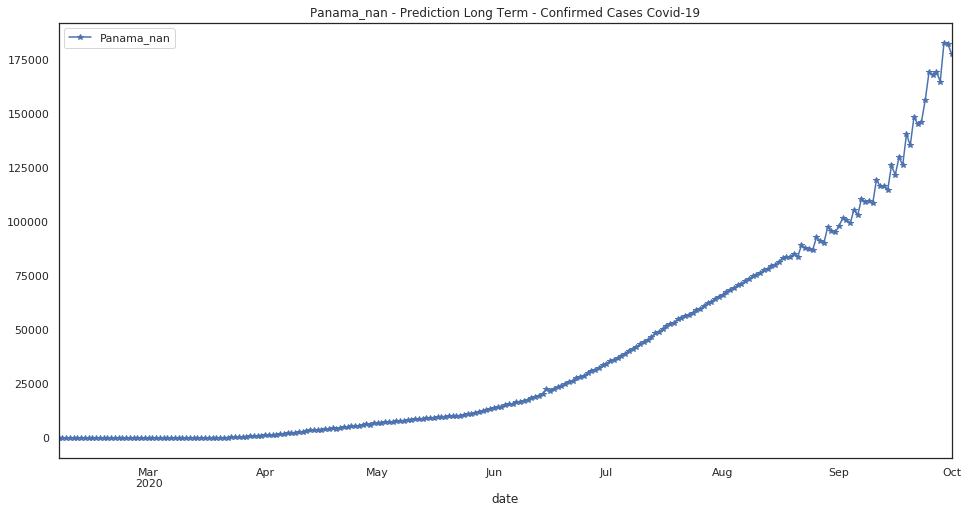

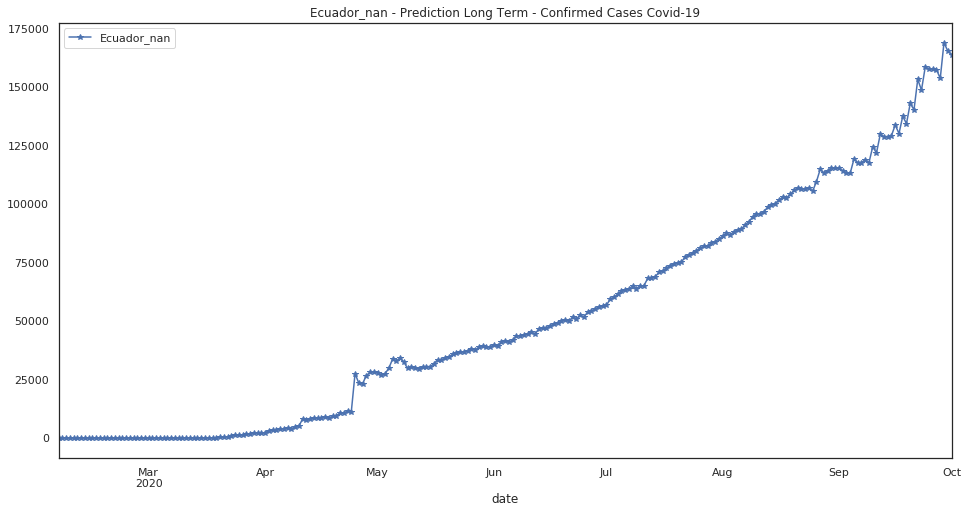

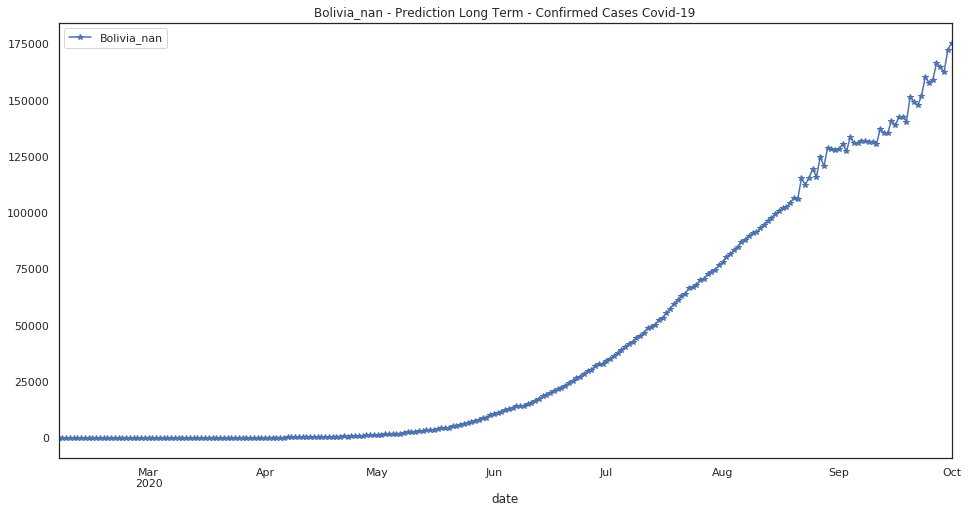

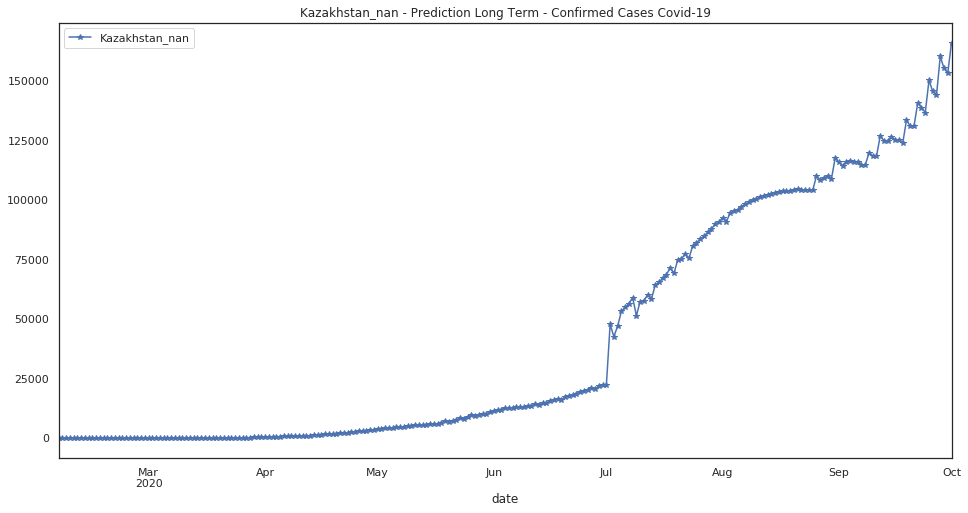

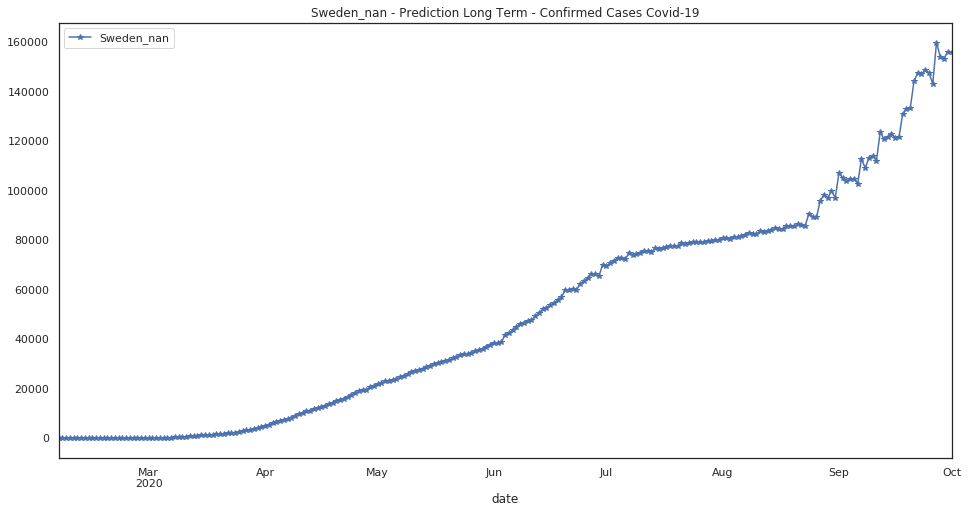

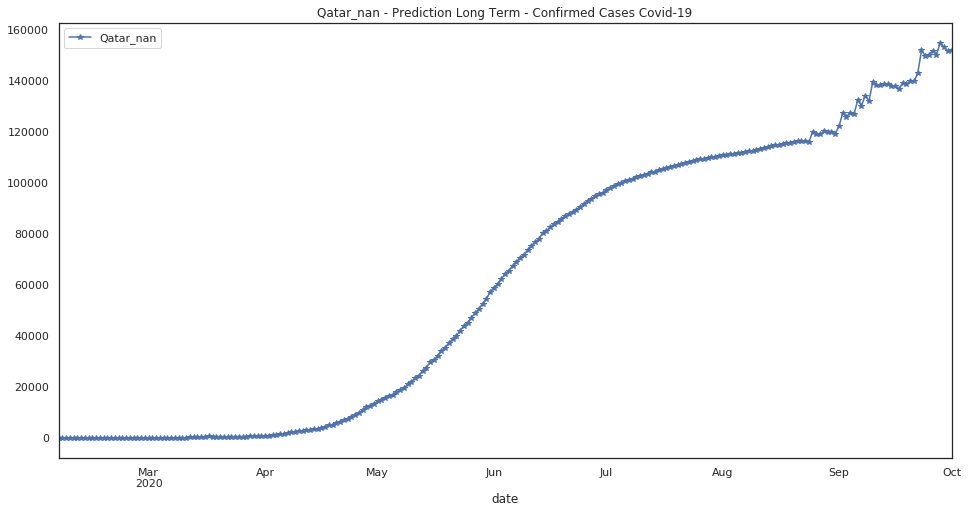

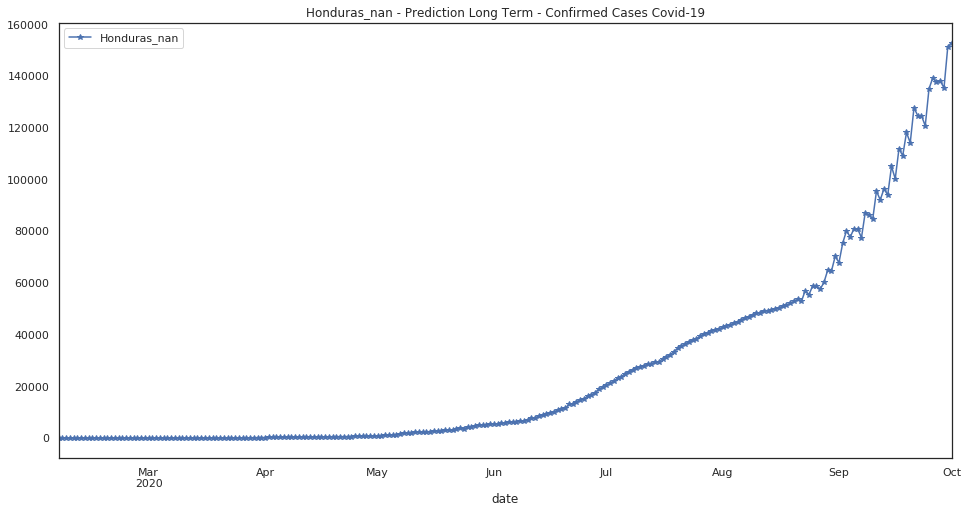

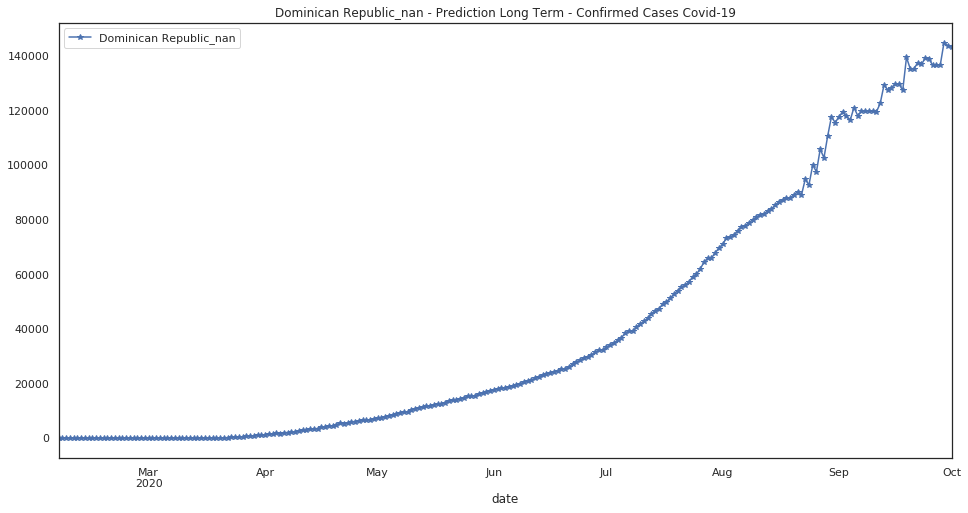

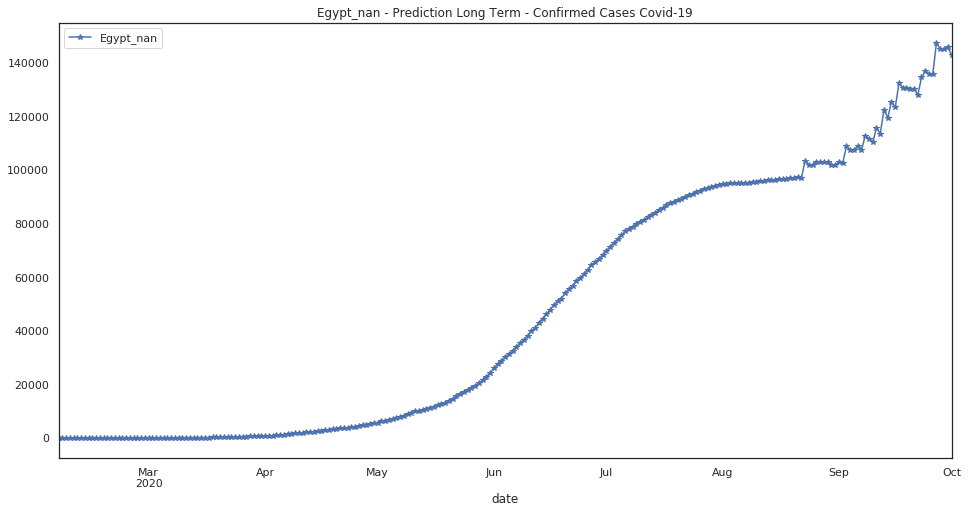

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

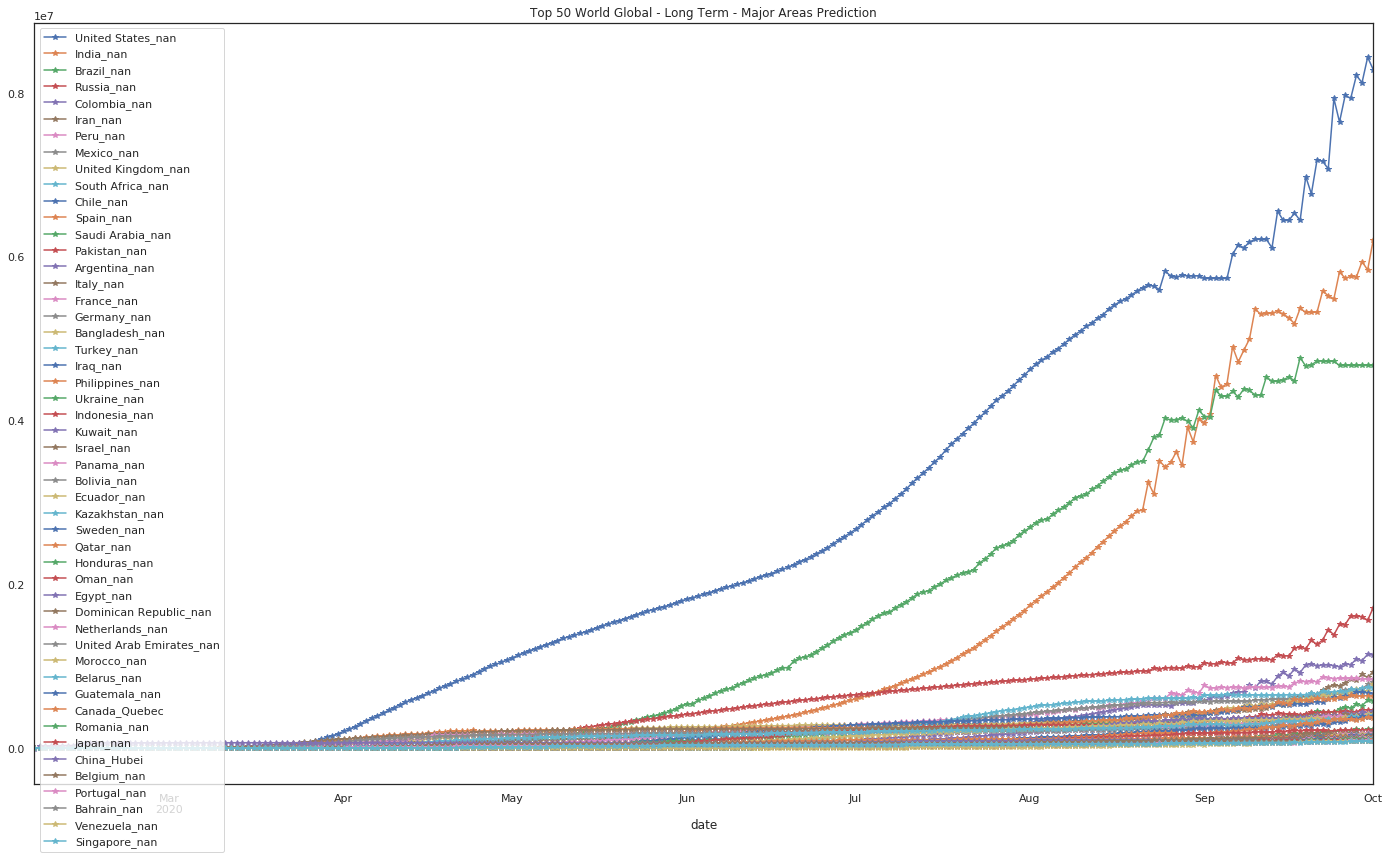

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

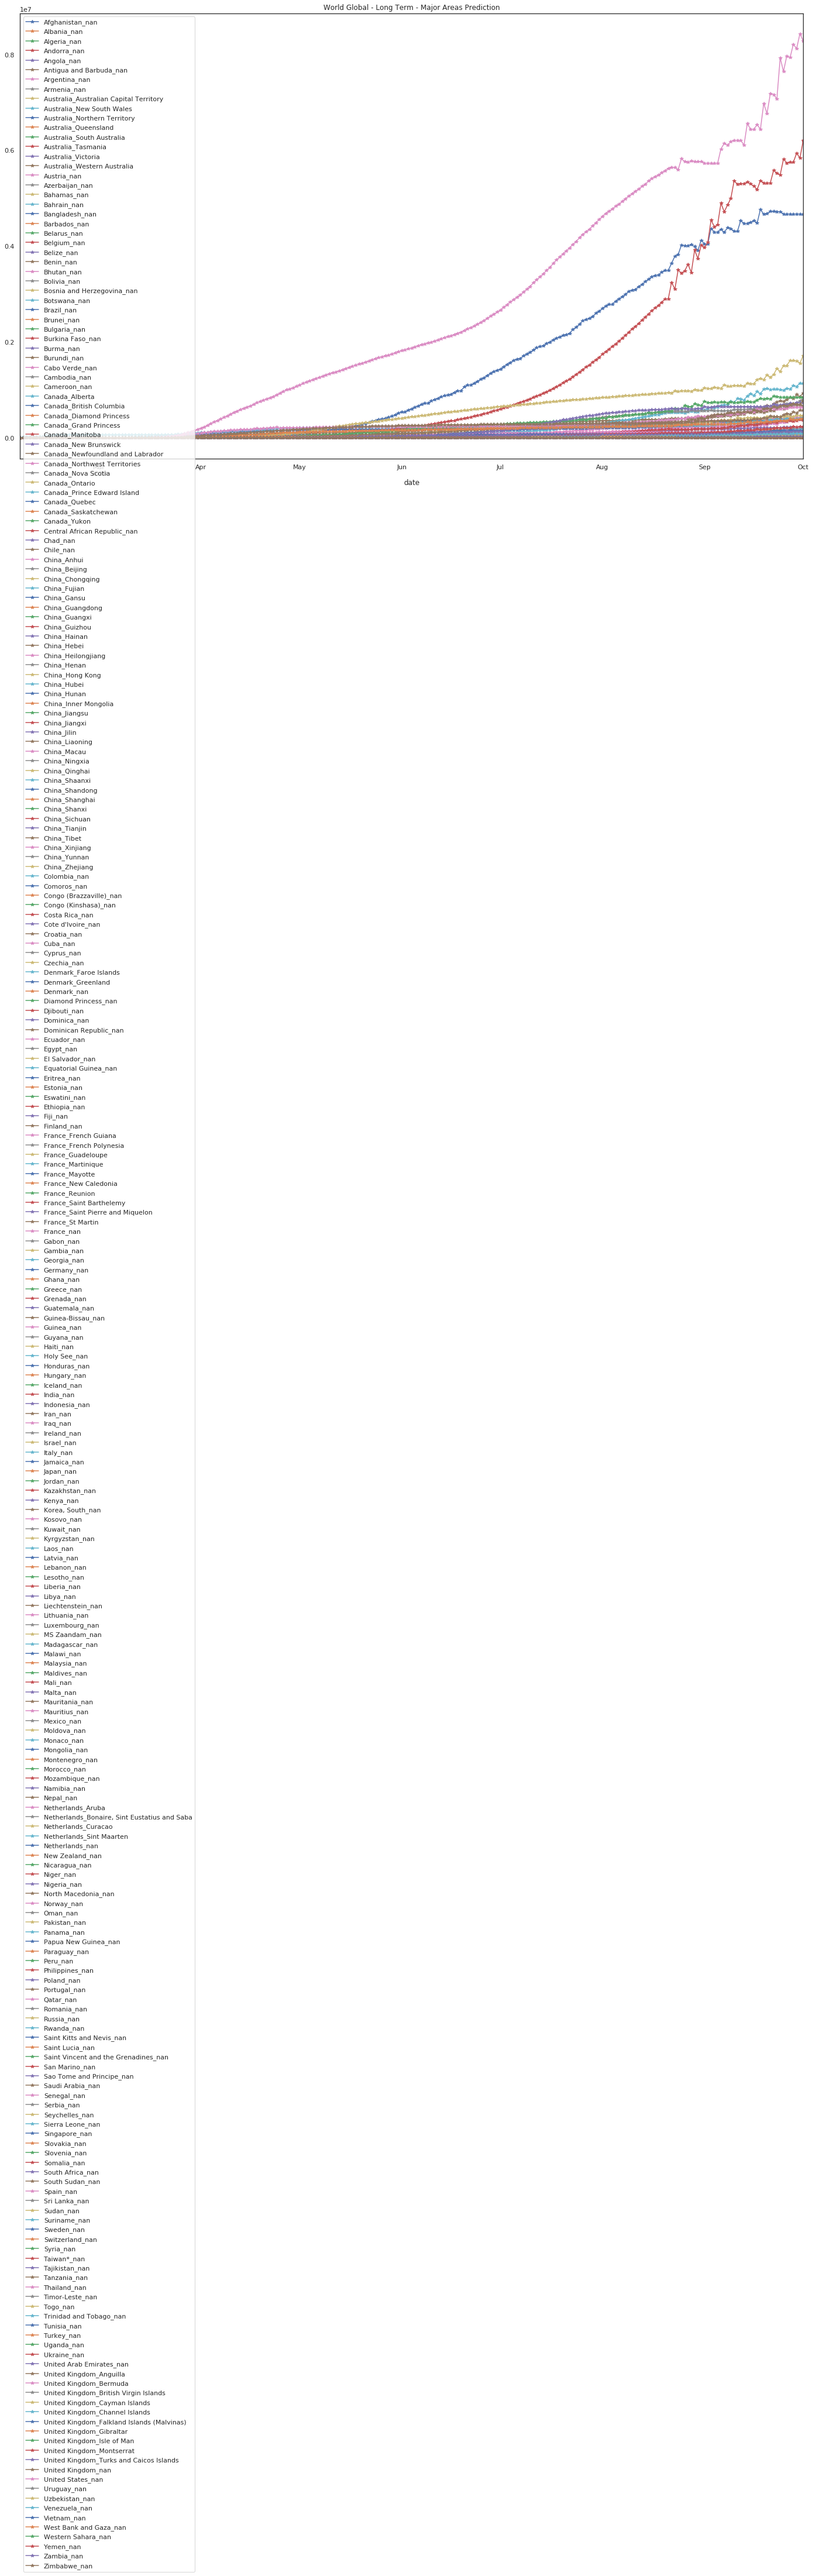

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             47.0         85.0        179.0        192.0   
2020-03-23             71.0        100.0        266.0        253.0   
2020-03-24             53.0        113.0        285.0        223.0   
2020-03-25            109.0        132.0        329.0        188.0   
2020-03-26            120.0        157.0        368.0        212.0   
2020-03-27            129.0        199.0        459.0        250.0   
2020-03-28            162.0        210.0        503.0        299.0   
2020-03-29            155.0        223.0        538.0        350.0   
2020-03-30            144.0        245.0        592.0        369.0   
2020-03-31            236.0        249.0        645.0        429.0   
2020-04-01            186.0        271.0        803.0        423.0   
2020-04-02            283.0        283.0        938.0        428.0   
2020-04-03            336.0        292.0       1060.0        487.0   
2020-04-04            327.0        323.0       1341.0        470.0   
2020-04-05            350.0        355.0       1416.0        491.0   
2020-04-06            434.0        390.0       1487.0        537.0   
2020-04-07            410.0        411.0       1662.0        552.0   
2020-04-08            502.0        411.0       1642.0        578.0   
2020-04-09            497.0        438.0       1753.0        602.0   
2020-04-10            540.0        445.0       1833.0        617.0   
2020-04-11            591.0        440.0       1903.0        647.0   
2020-04-12            617.0        459.0       1950.0        619.0   
2020-04-13            669.0        461.0       2066.0        679.0   
2020-04-14            740.0        488.0       2116.0        673.0   
2020-04-15            769.0        490.0       2214.0        681.0   
2020-04-16            863.0        509.0       2292.0        707.0   
2020-04-17            915.0        539.0       2379.0        688.0   
2020-04-18           1008.0        566.0       2560.0        724.0   
2020-04-19           1014.0        569.0       2683.0        731.0   
2020-04-20           1107.0        584.0       2779.0        732.0   
...                     ...          ...          ...          ...   
2020-09-02          39040.0       8730.0      45425.0       1203.0   
2020-09-03          41416.0       8632.0      44327.0       1209.0   
2020-09-04          40738.0       8898.0      48475.0       1209.0   
2020-09-05          41668.0       9413.0      47744.0       1209.0   
2020-09-06          41963.0       9250.0      49006.0       1209.0   
2020-09-07          41961.0       9354.0      48948.0       1203.0   
2020-09-08          42058.0       9530.0      51193.0       1203.0   
2020-09-09          41369.0      10392.0      50476.0       1196.0   
2020-09-10          42713.0      10165.0      52561.0       1248.0   
2020-09-11          44848.0      10640.0      50751.0       1237.0   
2020-09-12          45023.0      10583.0      54255.0       1229.0   
2020-09-13          45245.0      10459.0      52790.0       1269.0   
2020-09-14          44988.0      10912.0      56999.0       1263.0   
2020-09-15          47715.0      10937.0      59675.0       1246.0   
2020-09-16          46754.0      11444.0      59014.0       1307.0   
2020-09-17          47738.0      11372.0      57953.0       1326.0   
2020-09-18          47850.0      11225.0      64544.0       1305.0   
2020-09-19          50422.0      11800.0      62804.0       1412.0   
2020-09-20          52189.0      11713.0      61983.0       1392.0   
2020-09-21          51997.0      11461.0      65029.0       1392.0   
2020-09-22          51218.0      12530.0      62755.0       1390.0   
2020-09-23          54954.0      12186.0      67509.0       1448.0   
2020-09-24          54033.0      12186.0      70870.0       1403.0   
2020-09-25          53806.0      12117.0      69136.0       1505.0   
2020-09-26

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
238                                Thailand_nan  15.870032  100.992541   
239                             Timor-Leste_nan  -8.874217  125.727539   
240                                    Togo_nan   8.619500    0.824800   
241                     Trinidad and Tobago_nan  10.691800  -61.222500   
242                                 Tunisia_nan  33.886917    9.537499   
243                                  Turkey_nan  38.963700   35.243300   
244                           United States_nan  40.000000 -100.000000   
245                                  Uganda_nan   1.373333   32.290275   
246                                 Ukraine_nan  48.379400   31.165600   
247                    United Arab Emirates_nan  23.424076   53.847818   
248                     United Kingdom_Anguilla  18.220600  -63.068600   
249                      United Kingdom_Bermuda  32.307800  -64.750500   
250       United Kingdom_British Virgin Islands  18.420700  -64.640000   
251               United Kingdom_Cayman Islands  19.313300  -81.254600   
252              United Kingdom_Channel Islands  49.372300   -2.364400   
253  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
254                    United Kingdom_Gibraltar  36.140800   -5.353600   
255                  United Kingdom_Isle of Man  54.236100   -4.548100   
256                   United Kingdom_Montserrat  16.742498  -62.187366   
257     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
258                          United Kingdom_nan  55.378100   -3.436000   
259                                 Uruguay_nan -32.522800  -55.765800   
260                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      19               Bahrain_nan  26.027500   50.550000   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      27               Bolivia_nan -16.290200  -63.588700   
6      30                Brazil_nan -14.235000  -51.925300   
7      50             Canada_Quebec  52.939900  -73.549100   
8      55                 Chile_nan -35.675100  -71.543000   
9      69               China_Hubei  30.975600  112.270700   
10     89              Colombia_nan   4.570900  -74.297300   
11    105    Dominican Republic_nan  18.735700  -70.162700   
12    106               Ecuador_nan  -1.831200  -78.183400   
13    107                 Egypt_nan  26.820553   30.802498   
14    126                France_nan  46.227600    2.213700   
15    131               Germany_nan  51.165691   10.451526   
16    135             Guatemala_nan  15.783500  -90.230800   
17    141              Honduras_nan  15.200000  -86.241900   
18    144                 India_nan  20.593684   78.962880   
19    145             Indonesia_nan  -0.789300  113.921300   
20    146                  Iran_nan  32.427908   53.688046   
21    147                  Iraq_nan  33.223191   43.679291   
22    149                Israel_nan  31.046051   34.851612   
23    150                 Italy_nan  41.871940   12.567380   
24    152                 Japan_nan  36.204824  138.252924   
25    154            Kazakhstan_nan  48.019600   66.923700   
26    158                Kuwait_nan  29.311660   47.481766   
27    179                Mexico_nan  23.634500 -102.552800   
28    184               Morocco_nan  31.791700   -7.092600   
29    192           Netherlands_nan  52.132600    5.291300   
30    199                  Oman_nan  21.512583   55.923255   
31    200              Pakistan_nan  30.375300   69.345100   
32    201                Panama_nan   8.538000  -80.782100   
33    204                  Peru_nan  -9.190000  -75.015200   
34    205           Philippines_nan  12.879721  121.774017   
35    207              Portugal_nan  39.399900   -8.224500   
36    208                 Qatar_nan  25.354800   51.183900   
37    209               Romania_nan  45.943200   24.966800   
38    210                Russia_nan  61.524010  105.318756   
39    217          Saudi Arabia_nan  23.885942   45.079162   
40    222             Singapore_nan   1.283300  103.833300   
41    226          South Africa_nan -30.559500   22.937500   
42    228                 Spain_nan  40.463667   -3.749220   
43    232                Sweden_nan  60.128161   18.643501   
44    243                Turkey_nan  38.963700   35.243300   
45    244         United States_nan  40.000000 -100.000000   
46    246               Ukraine_nan  48.379400   31.165600   
47    247  United Arab Emirates_nan  23.424076   53.847818   
48    258        United Kingdom_nan  55.378100   -3.436000   
49    261             Venezuela_nan   6.423800  -66.589700   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                  12.0                 12.0                 12.0   
1                  12.0                 12.0                 12.0   
2                  12.0                 12.0                 12.0   
3                  12.0                 12.0                 12.0   
4                  21.0                 23.0                 14.0   
5                  12.0                 12.0                 12.0   
6                  12.0                 12.0                 12.0   
7                  12.0                 12.0                 12.0   
8                  12.0                 12.0                 12.0   
9              -11013.0              22112.0              24953.0   
10                 12.0                 12.0                 12.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()